# **Employee Attrition**

![enter image description here](https://www.techfunnel.com/wp-content/uploads/2020/04/employee-attrition.jpg)

---
# Table of Contents
---

**1.** **Introduction**

**2.** **Problem Statement**

**3.** **Installing & Importing Libraries**
  - **3.1** **Installing Libraries**
  - **3.2** **Importing Libraries**

**4.** **Dataset Description**
    
**5.** **Examine the Data**
 
**6.** **Description of challenges and the Solutions**

**7.** **Resolve the challenges**

**8** **EDA and Inferences**

**9.** **Model Development and Evaluation**

**10.** **Hyperparameter Tuning**

**11.** **Fit and tune models with cross-validation**
 
**12.** **Evaluate models and finalize the model**

**13.** **Processing the Unseen Data**

**14.** **Predicting the Unseen Data**

# 1. Introduction

- Our **client** for this project is the **HR Department at a software company**.

- They want to **try a new initiative to retain employees**.

- **The idea is to use data to predict whether an employee is likely to leave**.
Once these employees are identified, HR can be more proactive in reaching out to them before it's too late. They only want to deal with the data that is related to permanent employees.

- Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

- **This suffers from the following problems**:

This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
The second problem is these insights can't be aggregated and interlaced across all employees who have left.
The third is that it is too late by the time the proposed policy changes take effect.

- **The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach**.

# 2. Problem Statement

- We are given datasets of past employees and their status (still employed or already left).
- Our task is to build a classification model using the datasets.
- Because there was no machine learning model for this problem in the company, we don’t have quantifiable win condition. We need to build the best possible model.




- **Problem Specifics:**
1. Deliverable: Predict whether an employee will stay or leave.
2. Machine learning task: Classification
3. Target variable: Status (Employed/Left)
4. Win condition: N/A (best possible model)

# 3. Installing & Importing Libraries

## 3.1 Installing Libraries

In [2]:
#pip install mysql-connector-python
#!pip install -q pandas-profiling
#!pip install folium
#!pip install translate
#!pip install regex
# pip install yellowbrick

## 3.2 Importing Libraries

In [3]:
import numpy as np
import os
import mysql.connector as sql
from pandas_profiling import ProfileReport

##---------------------------------------------------------------------------------------------------

import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# ----------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     #Importing for data visualization
import seaborn as sns                                               #Importing for data visualization

## ----------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model
from yellowbrick.model_selection import FeatureImportances          # To retrieve Feature Importances over model
from sklearn.metrics import classification_report                   # To generate classification report of the model
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix of the model
from sklearn.metrics import accuracy_score                          # To calculate the accuracy score
from sklearn.metrics import fbeta_score

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To perform train, test and split over the data
from sklearn.linear_model import LogisticRegression                 # To perform modeling using LogisticRegression
from sklearn.svm import SVC                                         # To perform modeling using SVC
from sklearn.tree import DecisionTreeClassifier                     # To perform modeling using DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                 # To perform modeling using RandomForestClassifier
from sklearn.ensemble import VotingClassifier                       # To perform modeling using VotingClassifier
from sklearn.ensemble import BaggingClassifier                      # To perform modeling using BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier                     # To perform modeling using AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier             # To perform modeling using GradientBoostingClassifier
import datetime                                                     # Importing to extract the hourly component
from sklearn import tree
from sklearn.model_selection import GridSearchCV                    # To tune the models

##-----------------------------------------------------------------------------------------------------
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 4. Data Acquisition & Description

The Business Intelligence Analysts of the Company provided us three datasets that contain information about past employees and their status (still employed or already left).

#### **Department Data** 
This dataset contains information about each department. The schema of the dataset is as follows:

|Variables| Descriptions |
|--|--|
| dept_id  | Unique Department Code |
|dept_name | Name of the Department  |
|dept_head |Name of the Head of the Department   |

#### **employee_details_data**
This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

|Variables| Descriptions |
|--|--|
| employee_id  | Unique ID Number for each employee |
|age  | Age of the employee  |
| gender | Gender of the employee |
| marital_status| Marital Status of the employee  |

#### **employee_data**
This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

|Variables| Descriptions |
|--|--|
| **Target variable** |  |
| status | Current employment status (Employed / Left) |
| **Administrative information** |  |
|department| Department to which the employees belong(ed) to |
|salary  | Salary level with respect to rest of their department  |
|tenure   |  Number of years at the company|
| recently_promoted | Was the employee promoted in the last 3 years? |
| employee_id | Unique ID Number for each employee  |
| **Workload information** |  |
| n_projects  |Number of projects employee has worked on  |
| avg_monthly_hrs  | Average number of hours worked per month |
|**Workload information**  |  |
| satisfaction |Score for employee’s satisfaction with the company (higher is better)  |
|last_evaluation   |Score for most recent evaluation of employee (higher is better)  |
|filed_complaint  |Has the employee filed a formal complaint in the last 3 years?  |

# 5. Examine the Data

In [4]:
#Downloading the department_data table from the Capstone1 dtabase in SQL

connection = sql.connect(host='cpanel.insaid.co', database='Capstone2', user='student', password='student')
cursor = connection.cursor()
cursor.execute('SELECT * FROM department_data',)
table_rows = cursor.fetchall()
department_data = pd.DataFrame(table_rows)
department_data.shape

(11, 3)

In [5]:
#Downloading the employee_details_data table from the Capstone1 dtabase in SQL

connection = sql.connect(host='cpanel.insaid.co', database='Capstone2', user='student', password='student')
cursor = connection.cursor()
cursor.execute('SELECT * FROM employee_details_data')
table_rows2 = cursor.fetchall()
employee_details_data = pd.DataFrame(table_rows2)
#employee_details_data=pd.read_sql_query("SELECT * FROM employee_details_data",connection)
employee_details_data.shape

(14245, 4)

In [6]:
#Downloading the employee_data table from the Capstone1 dtabase in SQL

connection = sql.connect(host='cpanel.insaid.co', database='Capstone2', user='student', password='student')
cursor = connection.cursor()
cursor.execute('SELECT * FROM employee_data')
table_rows3 = cursor.fetchall()
employee_data = pd.DataFrame(table_rows3)
employee_data.shape

(14150, 11)

In [7]:
employee_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,246.00,None,None,0.86684,6,nan,medium,0.13442,Left,4.00,124467
1,134.00,None,None,0.55572,2,nan,low,0.51104,Left,3.00,112210
2,156.00,D00-SS,1.00,0.47408,2,nan,medium,0.40510,Left,3.00,126150
3,256.00,D00-SP,None,0.96136,6,nan,low,0.15297,Left,4.00,125346
4,146.00,D00-SS,None,0.50735,2,nan,medium,0.43484,Left,3.00,113707


In [8]:
employee_details_data.head()

,0,1,2,3
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [9]:
department_data.head()

,0,1,2
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


# 6. Description of challenges and Solutions

### Observation:

|Problems |  Solution|
|--|--|
|department_data and employee_details_data tables have consistent data and no null values. | No problem to resolve | | Missing Column names on the data  | Manually renamed the columns on the datasets|
| Recently_promoted: Value of 1 exists for 297 rows and rest is null and hence can be assumed to be not recently promoted | Update the Null values to 0 meaning not recently promoted | 
|employee_details_data has missing values in 1. Department, 2. Tenure  | Department and Tenure null values were replaced with mode of department |
| employee_details_data has missing values in 1. Filed Complaints, 2. Recently promoted | Filed complaint and Recently_promoted null values were replaced with '0'   | 
| employee_details_data has missing values in 1. Satisfaction, 2. Last evaluation | Satisfaction and Last evaluation null values were filled in with Mean |
|Tenure and avg_monthly_hrs reflecting as datatype= Object instead of float | Type casted this to float.  |
| Filed_complaint |  |
| Employee Id column in employee_data table has duplicates and also has five rows with 0 as values| Deleted the ones which are 0 or duplicates. . |
| Department column has inconsistent value of '-IT' | Replaced with consistent value 'D00-IT' |
| Merger: Need to Merge the 3 tables for the final datasets  | Combined the employee_details_data with employee_data table with left joint on Employee ID named as Trial_1 |
| Merger: Need to Merge the 3 tables for the final datasets  | Combined the department_data with trial_1 dataframe with left joint (right_on=dept_ID and left_on = ' department')named as emp_data |
| Individual columns were analyzed to check for outliers and distribution |  |
| Checked for Correlation between variables | 1. Moderate correlation was observed (0.62) between age and n_projects, 2. little correlation was observed (0.44) between avg_monthly_hrs and n_projects|
| Final list of input variable columns for ML model building |List of columns: 'avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects', recently_promoted', 'satisfaction', 'tenure', 'age', 'gender','marital_status', 'salary' , 'department'  |
|gender, marital status, Salary, department are categorical columns | Encoded using One hot encoding|
| 'avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction' are numerical columns| Scaled with StandardScalar|
|Important features for predicting the output variables|Randomforest classifier selected the following features as most important: 'avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure'  |

# 7.Resolve the challenges

In [10]:
#Changing column names

department_data.rename(columns={0:'dept_id',1:'dept_name',2:'dept_head'},inplace=True)
employee_details_data.rename(columns={0:'employee_id', 1:'age', 2:'gender', 3:'marital_status'},inplace=True)
employee_data.rename(columns={0:'avg_monthly_hrs',1:'department',2:'filed_complaint', 3:'last_evaluation', 4:'n_projects', 5:'recently_promoted', 6:'salary', 7:'satisfaction', 8:'status', 9:'tenure', 10:'employee_id'},inplace=True)

### checking for the values of the datasets

In [11]:
# Checking for the values of the department columns

department_data.value_counts()

dept_id  dept_name    dept_head            
D00-TP   Temp         Micheal Zachrey          1
D00-SS   Sales        Edward J Bayley          1
D00-SP   Support      Amelia Westray           1
D00-PR   Procurement  Louie Viles              1
D00-PD   Product      Darcy Staines            1
D00-MT   Marketing    Reuben Swann             1
D00-MN   Management   Ellie Trafton            1
D00-IT   IT           Henry Adey               1
D00-FN   Finance      Aanchal J                1
D00-ENG  Engineering  Sushant Raghunathan K    1
D00-AD   Admin        Evelyn Tolson            1
dtype: int64

In [12]:
# Checking for the values of the employee_details_data

employee_details_data.value_counts()

employee_id  age  gender  marital_status
148988       22   Male    Unmarried         1
107632       50   Male    Married           1
107653       25   Female  Unmarried         1
107652       31   Male    Married           1
107650       40   Male    Married           1
107649       27   Female  Married           1
107646       25   Female  Unmarried         1
107644       23   Male    Unmarried         1
107641       45   Female  Married           1
107640       26   Male    Unmarried         1
107638       37   Female  Married           1
107634       45   Female  Married           1
107633       22   Male    Unmarried         1
107631       42   Female  Married           1
107657       38   Female  Married           1
107630       26   Male    Unmarried         1
107629       46   Male    Married           1
107624       24   Female  Unmarried         1
107623       28   Female  Married           1
107622       34   Male    Married           1
107621       52   Female  Married      

In [13]:
# CHECKING THE DATASETS
department_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [14]:
employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [15]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  object 
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   object 
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  object 
 10  employee_id        14150 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 1.2+ MB


### Observations:
 1. **department_data** and the **employee_details_data** have no missing values
 2. **employee_data** have missing values in **department, filed_complaint, last_evaluation, recently_promoted, satisfaction, tenure**
 3. We need to impute the missing values in **department** from department_data table
 4. Incorrect datatype for **tenure**
 4. 

In [16]:
employee_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.86684,6,nan,medium,0.13442,Left,4.00,124467
1,134.00,None,None,0.55572,2,nan,low,0.51104,Left,3.00,112210
2,156.00,D00-SS,1.00,0.47408,2,nan,medium,0.40510,Left,3.00,126150
3,256.00,D00-SP,None,0.96136,6,nan,low,0.15297,Left,4.00,125346
4,146.00,D00-SS,None,0.50735,2,nan,medium,0.43484,Left,3.00,113707


In [17]:
employee_data['recently_promoted'].value_counts()

1.00000    297
Name: recently_promoted, dtype: int64

In [18]:
employee_data['tenure'].value_counts()

3.00     6018
2.00     3023
4.00     2394
5.00     1369
6.00      660
10.00     201
7.00      180
8.00      155
Name: tenure, dtype: int64

#### Before merging the datasets, need to verify the values for the column department in the concerned datasets

In [19]:
employee_data['employee_id'].value_counts()

0         5
119780    2
104360    2
116850    2
109425    2
116533    2
105625    2
117454    2
102701    2
108265    2
112373    2
111323    2
106813    2
115446    2
112312    2
115325    2
110000    2
112203    2
111968    2
108128    2
101809    2
122385    2
116247    2
116153    2
116209    2
110546    2
109804    2
109085    2
108535    2
119754    2
113282    1
111251    1
113634    1
113298    1
107153    1
109200    1
119439    1
117388    1
103047    1
105094    1
105327    1
111587    1
137830    1
103031    1
105078    1
100980    1
111219    1
113266    1
107121    1
109168    1
115309    1
117356    1
101012    1
105110    1
103063    1
107201    1
105174    1
101076    1
101530    1
109536    1
111315    1
119503    1
117452    1
107489    1
111299    1
113346    1
109248    1
117404    1
137910    1
101044    1
119471    1
115373    1
117420    1
101028    1
111267    1
113314    1
113082    1
109216    1
103015    1
100300    1
133480    1
115229    1
119343    1
1152

#### Observations:

1. **employee_id** column in **employee_data** have **0** and **duplicates** as values. 
2. **Droping** the **employee_id=0**
3. Checking for the duplicate values

In [20]:
employee_data[employee_data['employee_id']==0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.00,D00-SS,None,0.85270,6,nan,low,0.06917,Left,4.00,0
304,264.00,D00-ENG,None,0.77455,6,nan,low,0.11097,Left,4.00,0
1234,129.00,D00-SP,None,0.40266,2,nan,medium,0.43736,Left,3.00,0
11304,167.00,None,None,0.88005,5,nan,low,0.68214,Employed,3.00,0
12304,259.00,D00-ENG,None,0.50588,5,nan,low,0.63105,Employed,4.00,0


In [21]:
employee_data= employee_data.drop(axis=0, index= [34,304,1234,11304, 12304])

### Checking for duplicated Rows

In [22]:
duplicate=employee_data.loc[employee_data.duplicated(), :]
duplicate.shape

(29, 11)

In [23]:
employee_data.duplicated(subset=['employee_id']).sum()

29

In [24]:
# creating a new dataframe containing duplicate employee_id

duplicate_2= employee_data[employee_data.duplicated(subset=['employee_id'])]
duplicate_2.head(29)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14121,265.00,D00-MN,1.00,0.82567,3,nan,low,0.54598,Employed,10.00,112373
14122,282.00,D00-SS,None,0.87543,6,nan,low,0.06591,Left,4.00,116247
14123,206.00,D00-SS,None,1.00000,6,nan,medium,0.78355,Left,5.00,112203
14124,161.00,D00-IT,None,0.71589,6,nan,medium,0.86777,Left,4.00,108128
14125,163.00,D00-SP,None,0.48618,3,nan,medium,0.83212,Employed,3.00,115446
14126,208.00,D00-FN,None,0.69976,4,nan,low,0.47622,Employed,5.00,110546
14127,152.00,D00-MT,None,0.51002,3,nan,low,0.82653,Employed,2.00,111968
14128,307.00,D00-IT,None,0.90571,7,nan,low,0.12527,Left,4.00,111323
14129,212.00,D00-PD,None,0.77302,4,nan,medium,0.82932,Employed,2.00,117454
14130,148.00,D00-MN,None,0.57711,3,nan,high,0.48100,Employed,10.00,109425


In [25]:
# filtering out the unique employee_id values in duplicate dataframe

dup= duplicate_2['employee_id'].unique()
dup

array([112373, 116247, 112203, 108128, 115446, 110546, 111968, 111323,
       117454, 109425, 119754, 106813, 116850, 122385, 104360, 109804,
       116209, 105625, 116533, 102701, 110000, 108535, 109085, 108265,
       101809, 116153, 119780, 115325, 112312], dtype=int64)

In [26]:
# Creating a new dataframe containg only the null department values

dept_null= employee_data[employee_data['department'].isna()]
dept_null.shape

(706, 11)

In [27]:
# Checking if any 'employee_id' values in dept_null dataframe is found in the unique employee_id values from duplicate dataframe

dept_null['employee_id'].isin(dup).sum()

0

### Observations:

1. **No duplicate entries** of the **employee_id** where **department= Null** found for replacement
2. Only way to fill up missing values is with **Mode  of department** column in employee_data

#### Filling up the missing values in department column with mode

In [28]:
employee_data['department']= employee_data['department'].fillna(employee_data['department'].mode()[0])
employee_data['department'].isna().sum()

0

In [29]:
# checking the values of department in employee_data
employee_data['department'].value_counts()

D00-SS     4610
D00-ENG    2573
D00-SP     2112
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [30]:
# verifying the values of dept_id in department_data
department_data['dept_id'].value_counts()

D00-IT     1
D00-ENG    1
D00-MN     1
D00-AD     1
D00-SP     1
D00-MT     1
D00-SS     1
D00-TP     1
D00-PD     1
D00-PR     1
D00-FN     1
Name: dept_id, dtype: int64

### Observations:

1. **department** column in **employee** have inconsistent data **-IT**. This value is **not listed** in **dept_id** column of **department_data**
3. **replacing** the value **-IT** with **D00-IT** in **department**

In [31]:
employee_data['department'].replace(to_replace='-IT', value='D00-IT', inplace = True)
employee_data['department'].value_counts()

D00-SS     4610
D00-ENG    2573
D00-SP     2112
D00-IT     1364
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [32]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14145 non-null  object 
 1   department         14145 non-null  object 
 2   filed_complaint    2046 non-null   object 
 3   last_evaluation    12658 non-null  float64
 4   n_projects         14145 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14145 non-null  object 
 7   satisfaction       13995 non-null  float64
 8   status             14145 non-null  object 
 9   tenure             13995 non-null  object 
 10  employee_id        14145 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [33]:
# Dropping the duplicate values

employee_data.drop_duplicates(subset='employee_id', keep='first', inplace=True)
employee_data.shape

(14116, 11)

In [34]:
# merging with left joint the datasets employee_details_data with employee_data

trial_1 = employee_data.merge(employee_details_data, on='employee_id', how='left')

In [35]:
trial_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  object 
 1   department         14116 non-null  object 
 2   filed_complaint    2041 non-null   object 
 3   last_evaluation    12629 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14116 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             13966 non-null  object 
 10  employee_id        14116 non-null  int64  
 11  age                14116 non-null  int64  
 12  gender             14116 non-null  object 
 13  marital_status     14116 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.6+ MB


In [36]:
# merging with left joint the datasets department_data with trial_1

emp_data = trial_1.merge(department_data, right_on = 'dept_id', left_on = 'department', how ='left')
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  object 
 1   department         14116 non-null  object 
 2   filed_complaint    2041 non-null   object 
 3   last_evaluation    12629 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14116 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             13966 non-null  object 
 10  employee_id        14116 non-null  int64  
 11  age                14116 non-null  int64  
 12  gender             14116 non-null  object 
 13  marital_status     14116 non-null  object 
 14  dept_id            14116 non-null  object 
 15  dept_name          14116 non-null  object 
 16  dept_head          141

### Observations:

1. Total no. of **records** are **14116**
2. **filed_complaint, last_evaluation, recently_promoted, satisfaction, tenure** have missing values
3. Total no. of **columns** are **17**
4. **avg_monthly_hrs, filed_complaint, tenure** are **datatype= object**
5. **department** and **dept_id** contains **same information** hence dropping dept_id


In [37]:
# Making a copy of the final dataet
data_copy=emp_data.copy(deep=True)

In [38]:
emp_data.drop(axis=1, columns='dept_id', inplace=True)
emp_data.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status', 'dept_name',
       'dept_head'],
      dtype='object')

In [39]:
#Define charting functions to look into the distribution and outliers of the features

#Histogram

def plotHistChart(data=None, column=None, bins=10, xlabel=None):
  """Creates histogram chart depicting frequency distribution of numerical features."""

  # Create a figure size of 15 X 7 inches.
  figure = plt.figure(figsize=[15, 7])

  # Using .hist() function to pass the labels and values.
  plt.hist(x=data[column], bins=bins, color='green', alpha=0.6)

  # Set x, y labels of size 14 and title label of size 16.
  plt.xlabel(xlabel=xlabel, size=14)
  plt.ylabel(ylabel='Frequency', size=14)
  plt.title(label='Frequency Distribution of '+column, size=16)

  # Display the output
  plt.show()

#Box Plot
def plotBoxChart(data=None, column=None):
  """Creates box chart of numerical features."""

  # Create a figure size of 15 X 7 inches.
  figure = plt.figure(figsize=[15, 7])

  # Using .boxplot() function to pass data column
  plt.boxplot(x=data[column])

  # Set x, y labels of size 14 and title label of size 16.
  plt.xlabel(xlabel=column, size=14)
  plt.ylabel(ylabel='Values', size=14)
  plt.title(label='Box Distribution of '+column, size=16)

  # Display the output
  plt.show()

In [40]:
emp_data['status'].value_counts()

Employed    10761
Left         3355
Name: status, dtype: int64

<AxesSubplot:>

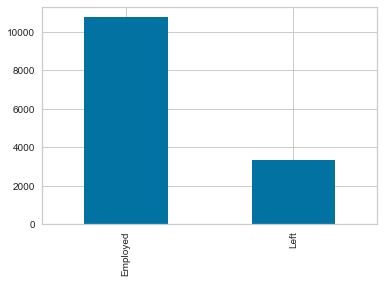

In [41]:
emp_data['status'].value_counts().plot(kind='bar')

In [42]:
a=0
b=0
for i in emp_data['status']:
    if i=='Employed':
        a=a+1

    
    else:
        b= b+1
        
Employed_percnt= 100*(a/len(emp_data['status']))
left_percnt = 100*(b/len(emp_data['status']))
print("Employed percentage", Employed_percnt)
print("Left percentage", left_percnt)
        

Employed percentage 76.23264380844432
Left percentage 23.76735619155568


### Observations:

  
1. Target Variable **Status** is a bi-class categorical variable
2. The classes are **Employed** and **Left**
3. Classes needs to be **converted into 1 and 0**
4. **Mildly imbalanced dataset** as the composition is  **Employed=76.22%** and **Left=23.75**  

### Checking the filed_complaint column

In [43]:
emp_data['filed_complaint'].value_counts()

1.00    2041
Name: filed_complaint, dtype: int64

In [44]:
emp_data['filed_complaint'].unique()

array([None, Decimal('1.00')], dtype=object)

In [45]:
emp_data['filed_complaint'].dtype

dtype('O')

#### Observations:

1. **filed_complaint** have values **1** and **None**
2. We can assume that:
          1= Complaint filed as YES 
          None= Compliant filed as NO
           
3. **Replacing Null with zero** for better interpretation where:
               1= Complaint filed as YES
               0= Compliant filed as NO
4. Incorrect datatype as **Object**

In [46]:
# replacing null values with 0

emp_data['filed_complaint']= emp_data['filed_complaint'].fillna(0)
emp_data['filed_complaint'].value_counts()

0       12075
1.00     2041
Name: filed_complaint, dtype: int64

In [47]:
# typecasting to float due to the presence of the value 1.00

emp_data['filed_complaint']= emp_data['filed_complaint'].astype(str).astype('float')
emp_data['filed_complaint'].dtype

dtype('float64')

<AxesSubplot:>

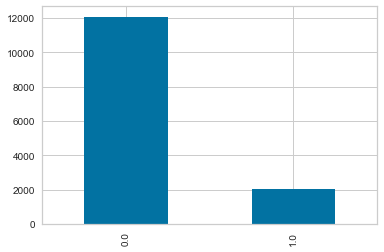

In [48]:
# plotting the filed_compliant

emp_data['filed_complaint'].value_counts().plot(kind='bar')

### Checking the Satisfaction column

In [49]:
emp_data['satisfaction'].value_counts()

1.00000    356
0.80875      2
0.98345      2
0.11280      2
0.55788      2
0.44557      2
0.57095      2
0.59819      2
0.47096      2
0.72353      2
0.44342      2
0.88289      2
0.84725      2
0.55684      2
0.52085      2
0.51363      2
0.93871      2
0.45471      2
0.80846      2
0.75416      2
0.16589      2
0.82604      2
0.48100      2
0.57461      2
0.47633      2
0.88888      2
0.61348      2
0.28334      2
0.80336      2
0.77883      2
0.56689      2
0.56517      2
0.55034      2
0.18853      2
0.48416      2
0.63174      2
0.85232      2
0.75802      2
0.51929      2
0.57224      2
0.35590      2
0.64170      2
0.65406      2
0.70157      2
0.78749      2
0.85090      2
0.46235      2
0.62247      2
0.52448      2
0.48188      2
0.42422      2
0.93888      2
0.90437      2
0.70344      2
0.91045      2
0.47108      2
0.79901      2
0.78486      2
0.73132      2
0.80351      2
0.92246      2
0.79270      2
0.94739      2
0.47747      2
0.81092      2
0.73836      2
0.77032   

In [50]:
emp_data['satisfaction'].describe()

count   13966.00000
mean        0.62132
std         0.25046
min         0.04006
25%         0.45037
50%         0.65255
75%         0.82491
max         1.00000
Name: satisfaction, dtype: float64

In [51]:
emp_data['satisfaction'].isna().sum()

150

### Observations:

1. **150 Missing values** 
2. **Mean=0.62130** and **Median= 0.65245**, implying **slight right skewness**
3. **Replace missing values** with **mean**

In [52]:
# replacing the Null values with 0

emp_data['satisfaction'].fillna(value=emp_data['satisfaction'].mean(), inplace=True)
emp_data['satisfaction'].isna().sum()

0

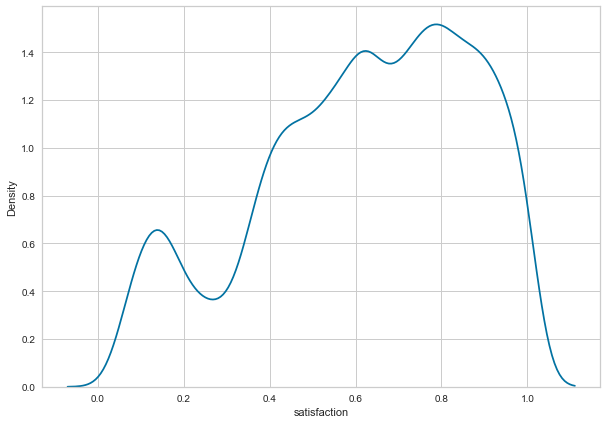

In [53]:
fig = plt.figure(figsize =(10, 7))
sns.kdeplot(x=emp_data['satisfaction'])
plt.show()

### Checking n_projects

In [54]:
emp_data['n_projects'].value_counts()

4    4044
3    3788
5    2566
2    2322
6    1093
7     242
1      61
Name: n_projects, dtype: int64

In [55]:
emp_data['n_projects'].describe()

count   14116.00000
mean        3.77777
std         1.24969
min         1.00000
25%         3.00000
50%         4.00000
75%         5.00000
max         7.00000
Name: n_projects, dtype: float64

### Observations:

1. **n_projects** have **7** distinct values
2. **Mean=3.77794** and **Median=4**, indicating little right skewness

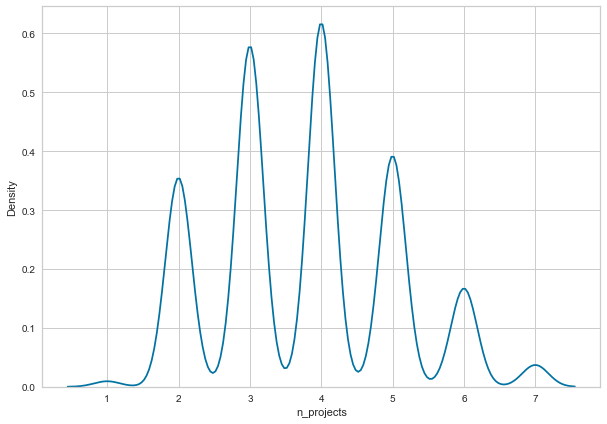

In [56]:
fig = plt.figure(figsize =(10, 7))
sns.kdeplot(x=emp_data['n_projects'])
plt.show()


### Cheking Age Column

Null count: 0
No.of unique values: 36
Unique values: [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
count   14116.00000
mean       32.89600
std         9.97500
min        22.00000
25%        24.00000
50%        29.00000
75%        41.00000
max        57.00000
Name: age, dtype: float64


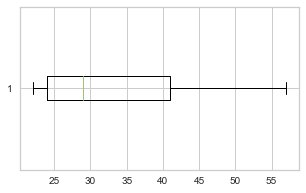

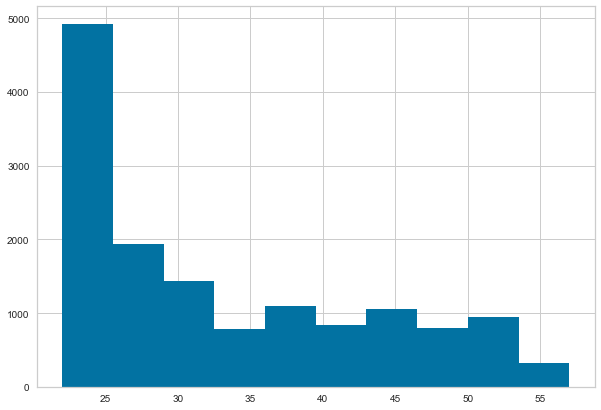

In [57]:
print("Null count:",emp_data.age.isnull().sum())
print("No.of unique values:",emp_data.age.nunique())
print("Unique values:",sorted(emp_data.age.unique()))
print(emp_data.age.describe())
fig = plt.figure(figsize =(5,3))
plt.boxplot(emp_data.age,vert=False)
x=emp_data.age
fig = plt.figure(figsize =(10, 7))
plt.hist(x)
plt.show()

## Observations:

1. No missing values for Age.
2. There is 36 unique values in age.
3. Values are from 22 to 57.
4. No Outliers.

### Cheking Last_Evaluation Column

total no. of unique values: 12184
Unique values are: [0.866838 0.555718 0.474082 ... 0.643553 0.836603 0.907277]
Null Count: 1487
count   14116.00000
mean        0.71832
std         0.16370
min         0.31617
25%         0.57952
50%         0.71832
75%         0.85685
max         1.00000
Name: last_evaluation, dtype: float64


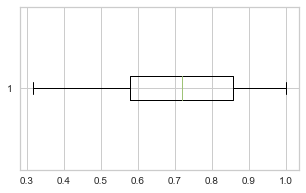

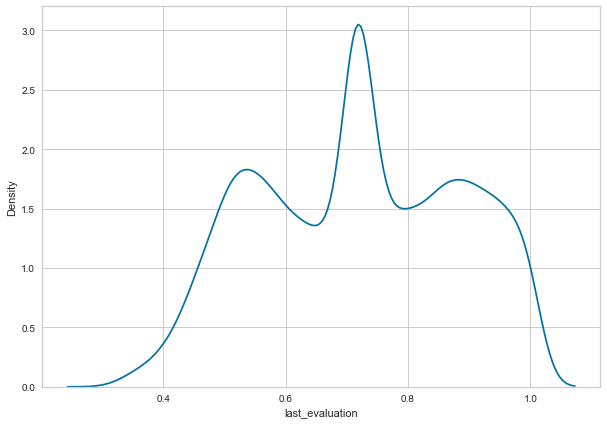

In [58]:
print("total no. of unique values:",emp_data.last_evaluation.nunique())
print("Unique values are:",emp_data.last_evaluation.unique())
print("Null Count:",emp_data.last_evaluation.isnull().sum())

#Filling null values with mean
emp_data.last_evaluation.fillna(emp_data.last_evaluation.mean(),inplace=True)
print(emp_data.last_evaluation.describe())
fig = plt.figure(figsize =(5,3))
plt.boxplot(emp_data.last_evaluation,vert=False)
fig = plt.figure(figsize =(10, 7))
sns.kdeplot(x=emp_data.last_evaluation)
plt.show()

## Observations:

1. There is 12188 unique values in last_evaluation column.
2. All values are between 0.3 to 1.
3. There is 1487 null values in last_evaluation column.
4. No outliers found.
5. Null values can be replaced with mean or median or mode(I have used mean).

### Checking for department

In [59]:
emp_data['department'].value_counts()

D00-SS     4601
D00-ENG    2573
D00-SP     2108
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [60]:
emp_data['department'].describe()

count      14116
unique        11
top       D00-SS
freq        4601
Name: department, dtype: object

In [61]:
emp_data['department'].isna().sum()

0

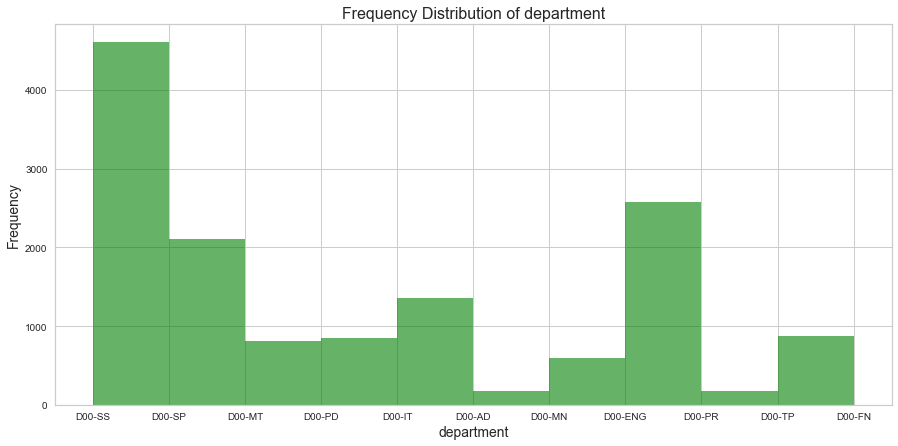

In [62]:
plotHistChart(data=emp_data, column='department', bins=10, xlabel='department')

### Observations:
#### Department is a categorical column with 11 unique values
1. **No Null values** 
2. **Maximum employees are from D00-SS department**

### Checking for salary

In [63]:
emp_data['salary'].describe()

count     14116
unique        3
top         low
freq       6889
Name: salary, dtype: object

emp_data['salary'].value_counts()

In [64]:
emp_data['salary'].isna().sum()

0

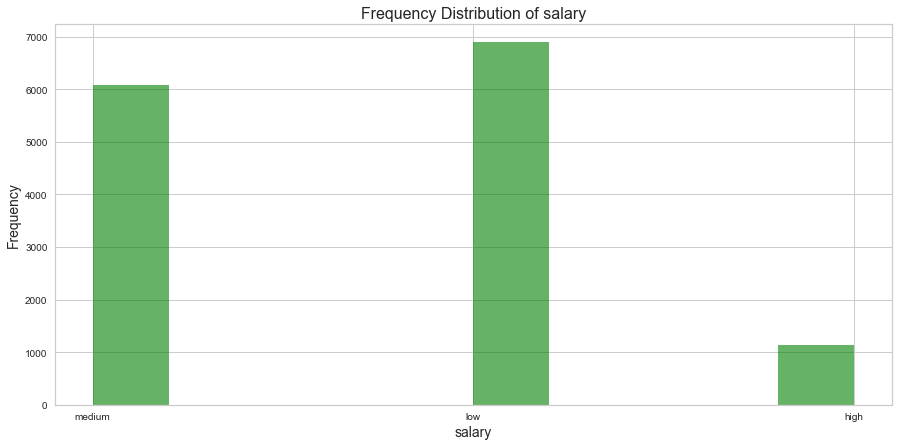

In [65]:
plotHistChart(data=emp_data, column='salary', bins=10, xlabel='salary')

### Observations:
- salary is a categorical column with 3 unique values
- **No Null values** 
- **Maximum employees are in low salary category**

### Checking for Gender

In [66]:
emp_data['gender'].describe()

count     14116
unique        2
top        Male
freq       9287
Name: gender, dtype: object

In [67]:
emp_data['gender'].value_counts()

Male      9287
Female    4829
Name: gender, dtype: int64

In [68]:
emp_data['gender'].isna().sum()

0

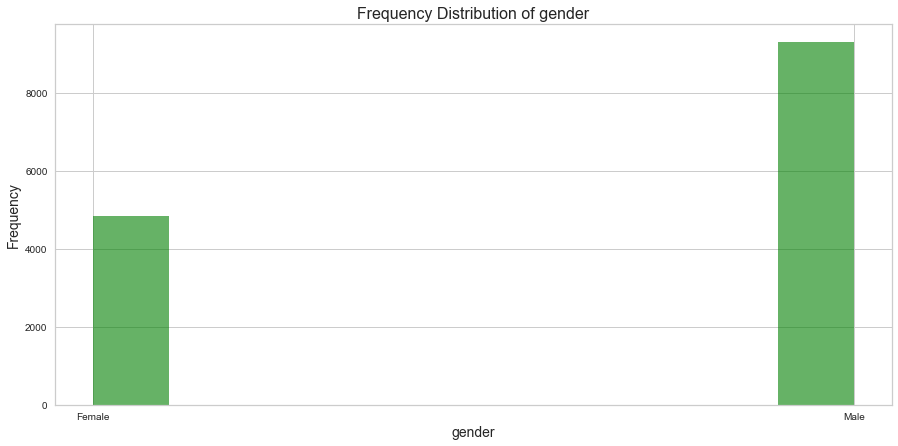

In [69]:
plotHistChart(data=emp_data, column='gender', bins=10, xlabel='gender')

### Observations:
- Gender is a categorical column with 2 unique values
- **No Null values** 
- **Maximum employees are Male**

### Checking for Marital Status

In [70]:
emp_data['marital_status'].isna().sum()

0

In [71]:
emp_data['marital_status'].value_counts()

Unmarried    7211
Married      6905
Name: marital_status, dtype: int64

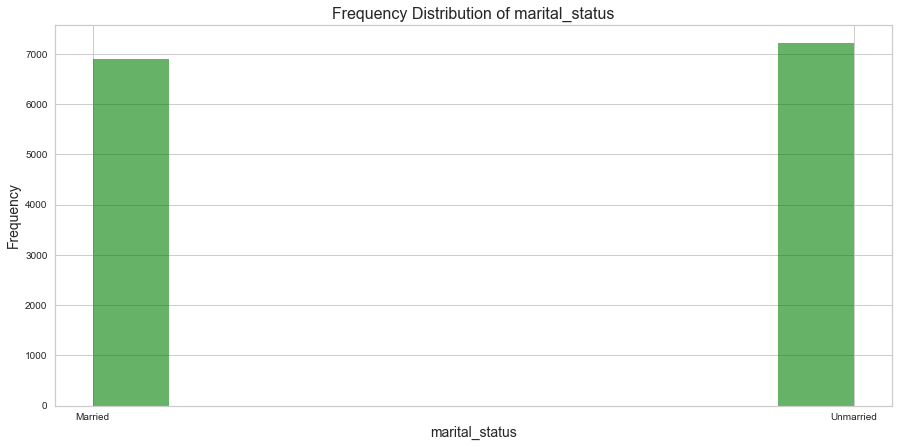

In [72]:
plotHistChart(data=emp_data, column='marital_status', bins=10, xlabel='marital_status')

### Observations:
- Marital status is a categorical column with 2 unique values
- **No Null values** 
- **Almost equal distribution between Married and Unmarried Employees**

### Checking for Avg Monthly Hours

In [73]:
emp_data['avg_monthly_hrs'].value_counts()

135.00    143
156.00    141
151.00    140
149.00    139
145.00    125
143.00    124
160.00    123
154.00    118
148.00    118
260.00    118
157.00    117
155.00    117
245.00    116
137.00    116
257.00    116
140.00    115
159.00    114
158.00    113
147.00    112
139.00    112
141.00    109
134.00    108
243.00    108
146.00    108
153.00    107
254.00    105
152.00    105
258.00    104
255.00    103
238.00    103
142.00    103
247.00    103
150.00    102
136.00    100
263.00    100
264.00    100
224.00    100
266.00     99
271.00     97
233.00     96
144.00     96
246.00     95
269.00     95
132.00     95
239.00     94
244.00     93
242.00     93
173.00     93
253.00     93
192.00     92
270.00     90
250.00     90
261.00     90
259.00     90
185.00     89
251.00     89
232.00     89
225.00     88
274.00     88
167.00     87
268.00     86
249.00     86
240.00     86
265.00     85
229.00     85
168.00     85
162.00     84
180.00     84
226.00     84
237.00     83
217.00     83
198.00

In [74]:
emp_data.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status', 'dept_name',
       'dept_head'],
      dtype='object')

#### Avg_monthly_hrs is a numeric column but is object type, so typecasting is required

In [75]:
emp_data.avg_monthly_hrs = emp_data.avg_monthly_hrs.astype('float64')

In [76]:
emp_data['avg_monthly_hrs'].describe()

count   14116.00000
mean      199.99263
std        50.82695
min        49.00000
25%       155.00000
50%       199.00000
75%       245.00000
max       310.00000
Name: avg_monthly_hrs, dtype: float64

In [77]:
emp_data['avg_monthly_hrs'].isna().sum()

0

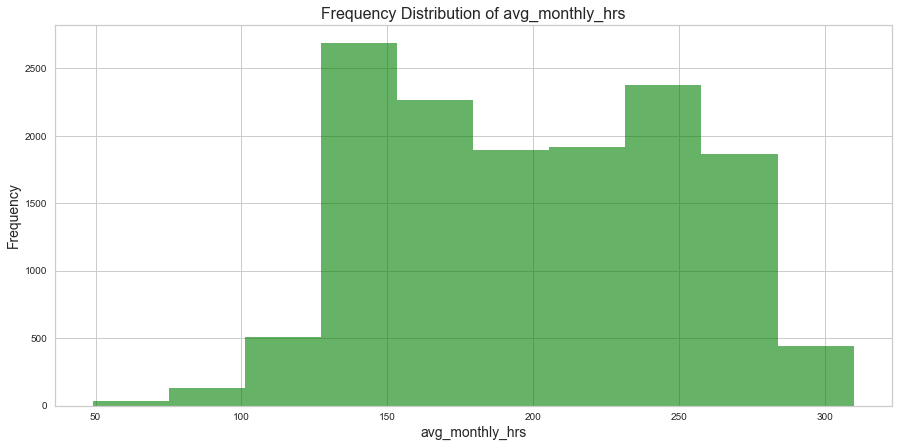

In [78]:
plotHistChart(data=emp_data, column='avg_monthly_hrs', bins=10, xlabel='avg_monthly_hrs')

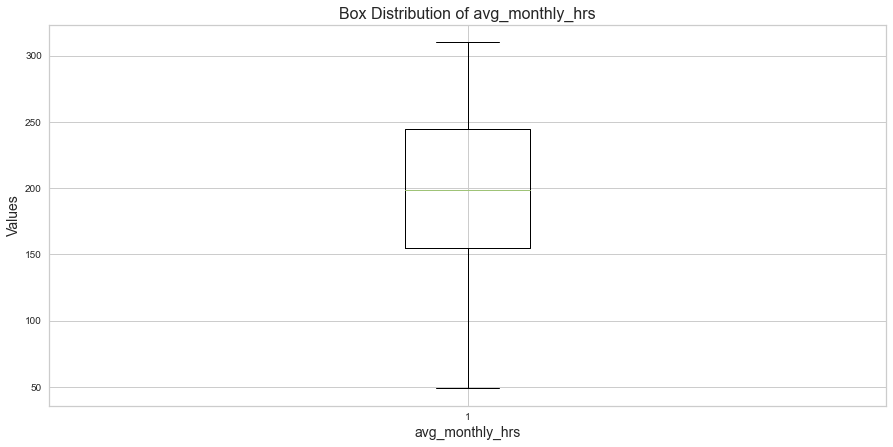

In [79]:
# plotting the avg_monthly_hrs

plotBoxChart(data=emp_data, column='avg_monthly_hrs')

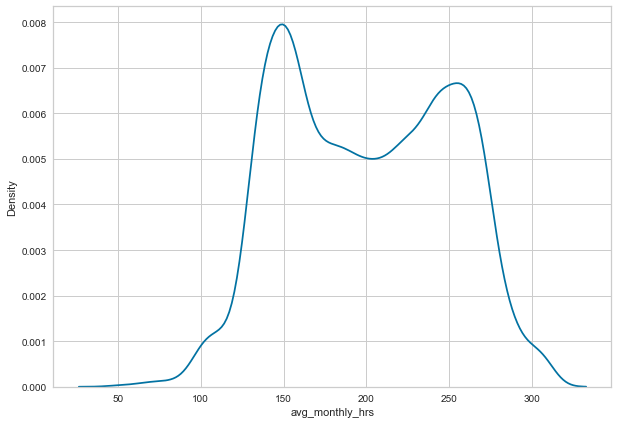

In [80]:
fig = plt.figure(figsize =(10, 7))
sns.kdeplot(x=emp_data['avg_monthly_hrs'])
plt.show()

### Observations:
- Avg_monthly_hrs is a numeric column but is object type, so typecasting is required
- **No missing values** 
- **Mean=199.99263** and is **Continuous** data within ***50 t0 310*** hours.  
- **No Null Values**  

### Checking for tenure

In [81]:
emp_data['tenure'].value_counts()

3.00     6006
2.00     3019
4.00     2386
5.00     1363
6.00      659
10.00     198
7.00      180
8.00      155
Name: tenure, dtype: int64

emp_data.tenure = emp_data.tenure.astype('float64')

In [82]:
emp_data['tenure'].describe()

count     13966
unique        8
top        3.00
freq       6006
Name: tenure, dtype: object

In [83]:
# There are 150 null values, replacing with mode

emp_data['tenure']= emp_data['tenure'].fillna(emp_data['tenure'].mode()[0])
 

In [84]:
emp_data['tenure'].isna().sum()

0

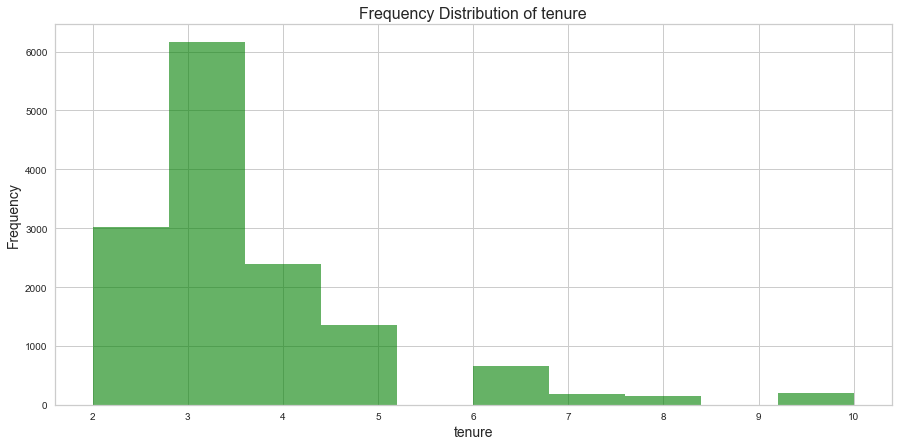

In [85]:
plotHistChart(data=emp_data, column='tenure', bins=10, xlabel='tenure')

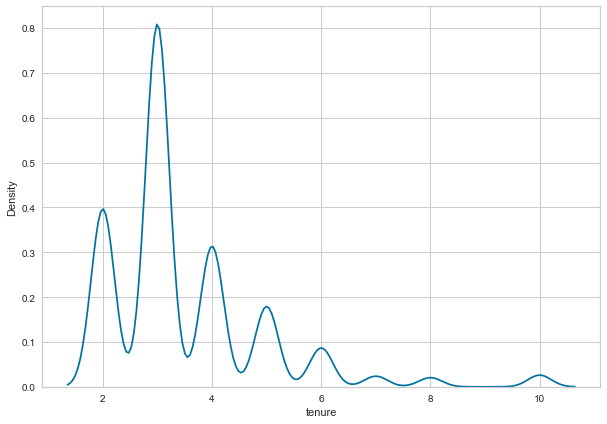

In [86]:
fig = plt.figure(figsize =(10, 7))
sns.kdeplot(x=emp_data['tenure'])
plt.show()

### Observations:
- **tenure have int values** but **incorrect datatype as object** and hence typecasting is required
- **150 missing values were updated with mode** 
- **most of the tenure lies betyween 2 to 6 years with a few going upto 10** 

### Checking for recently_promoted

In [87]:
emp_data['recently_promoted'].value_counts()

1.00000    297
Name: recently_promoted, dtype: int64

In [88]:
emp_data['recently_promoted'].describe()

count   297.00000
mean      1.00000
std       0.00000
min       1.00000
25%       1.00000
50%       1.00000
75%       1.00000
max       1.00000
Name: recently_promoted, dtype: float64

In [89]:
emp_data['recently_promoted'].isna().sum()

13819

In [90]:
# Replacing null values with 0 assuming blank means not promoted recently
emp_data['recently_promoted']= emp_data['recently_promoted'].fillna(0)

In [91]:
emp_data['recently_promoted'].value_counts()

0.00000    13819
1.00000      297
Name: recently_promoted, dtype: int64

### Observations:
- recently_promoted is a numeric column with value of 1 for recently promoted
- **13819 missing values were updated with 0** 
- **No additional analysis needed**

In [92]:
emp_data.groupby(['status']).mean()


,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,employee_id,age
status,,,,,,,,
Employed,197.90512,0.17554,0.71476,3.75922,0.02593,0.67512,111060.05074,33.18353
Left,206.68823,0.04531,0.72974,3.83726,0.00537,0.44878,115522.50343,31.97377


In [93]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   department         14116 non-null  object 
 2   filed_complaint    14116 non-null  float64
 3   last_evaluation    14116 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  14116 non-null  float64
 6   salary             14116 non-null  object 
 7   satisfaction       14116 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             14116 non-null  object 
 10  employee_id        14116 non-null  int64  
 11  age                14116 non-null  int64  
 12  gender             14116 non-null  object 
 13  marital_status     14116 non-null  object 
 14  dept_name          14116 non-null  object 
 15  dept_head          14116 non-null  object 
dtypes: float64(5), int64(3

### Correlation between the variables

Text(0.5, 1.0, 'Correlation between features')

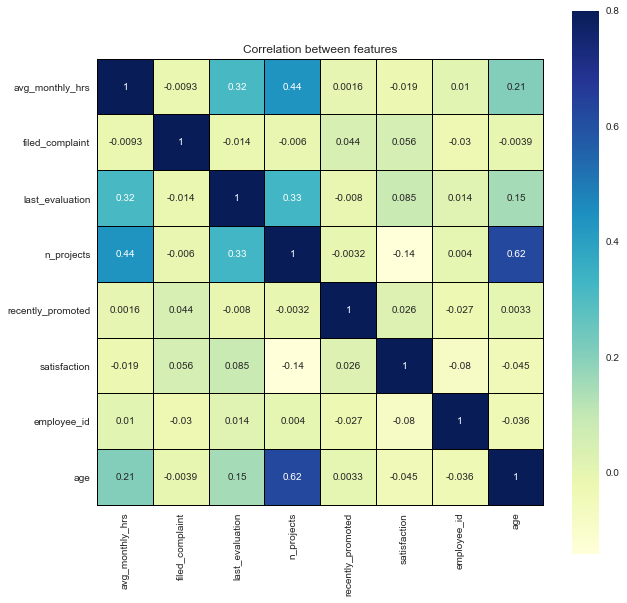

In [94]:
corr = emp_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, cmap='YlGnBu', annot = True,linecolor ='black')
plt.title('Correlation between features')


# 8. EDA and Inferences

### Relationship between age and status

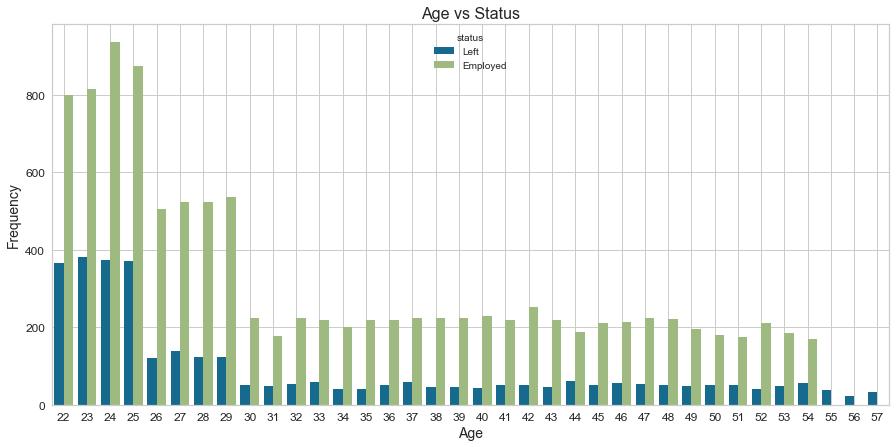

In [95]:
# checking the attrion rate across ages

fig = plt.figure(figsize=(15, 7))
sns.countplot(x='age', hue='status', data=emp_data)

plt.title(label='Age vs Status', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)
plt.show()

### Observations:

- Most **employees who left** belongs to the **age group below 30**.
- Employee who **left after the age of 50 is very less**.

### Gender vs Status

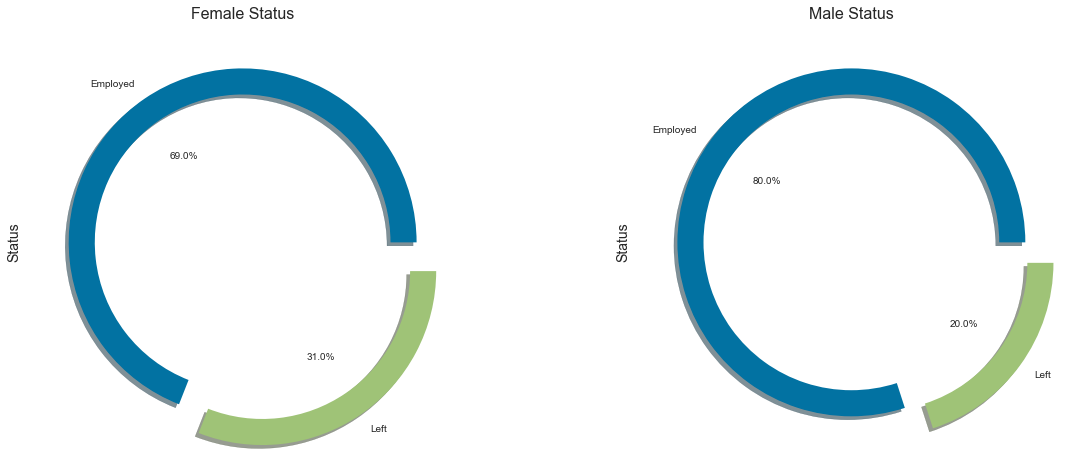

In [96]:
### checking the relation between the gender and status

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
gender = list(emp_data['gender'].unique())
custom_index = [0,1]
for i, j in zip(gender, custom_index):
    emp_data['status'][emp_data['gender']==i].value_counts() \
                                         .plot \
                                         .pie(explode=[0, 0.2],
                                              autopct='%1.1f%%', 
                                              wedgeprops=dict(width=0.15), 
                                              ax=ax[j], shadow=True)                                   
    ax[j].set_title(label= i.capitalize() +' Status', size=16)
    ax[j].set_ylabel(ylabel='Status', size=14)
plt.show()

### Observations:
    
- The percentage of **women employees** who left the company is **more than men by 11%**

### Percentage of employees left department wise

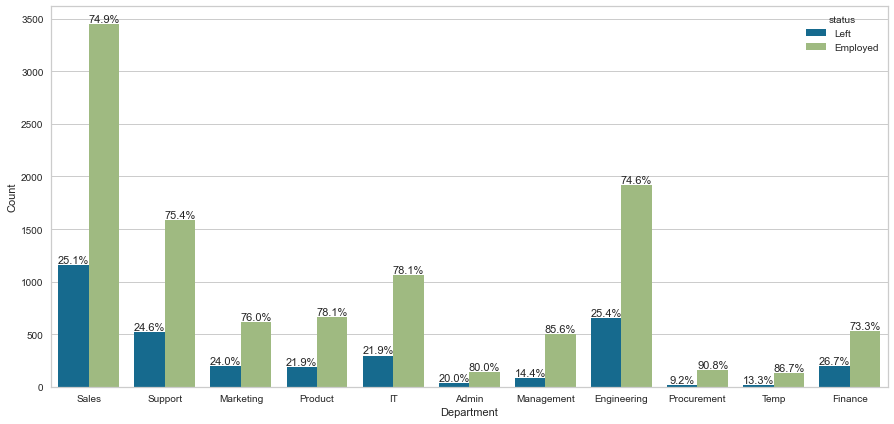

In [97]:
# Plotting the graph for attrition rate in all the departments

fig = plt.figure(figsize=(15, 7))
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
ax3 = sns.countplot(x="dept_name", hue="status", data=emp_data)
ax3.set(xlabel='Department', ylabel='Count')

percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

### Observations:
    
1. Almost **25% from each of the department Finance,Sales,Support,Engineering and Marketing** left the company.
2. Procurement, Management and Temporary department has the lowest percentage(below 15%).

### Status depending on salary

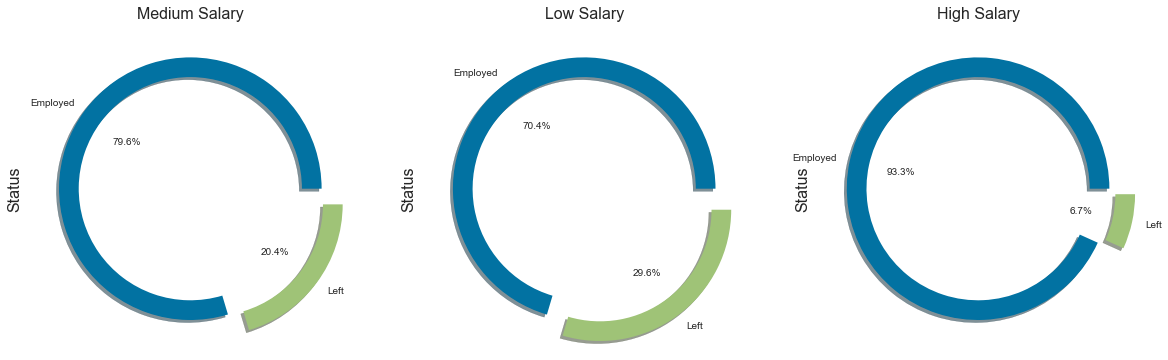

In [98]:
# checking the effect of salary on the status of employee

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
salary = list(emp_data['salary'].unique())
custom_index = [0,1,2]
for i, j in zip(salary, custom_index):
    emp_data['status'][emp_data['salary']==i].value_counts() \
                                         .plot \
                                         .pie(explode=[0, 0.2],
                                              autopct='%1.1f%%', 
                                              wedgeprops=dict(width=0.15), 
                                              ax=ax[j], shadow=True)                                   
    ax[j].set_title(label= i.capitalize() +' Salary', size=16)
    ax[j].set_ylabel(ylabel='Status', size=16)
plt.show()

### Observations:

- **29.6 % Employees with low salary** left the company. **Higher attrition among employees with low Salary**
- Only 6.7% of the Employee with  high salary left the company. **Less attrition among employess with high Salary**

### filed_complaint vs Status

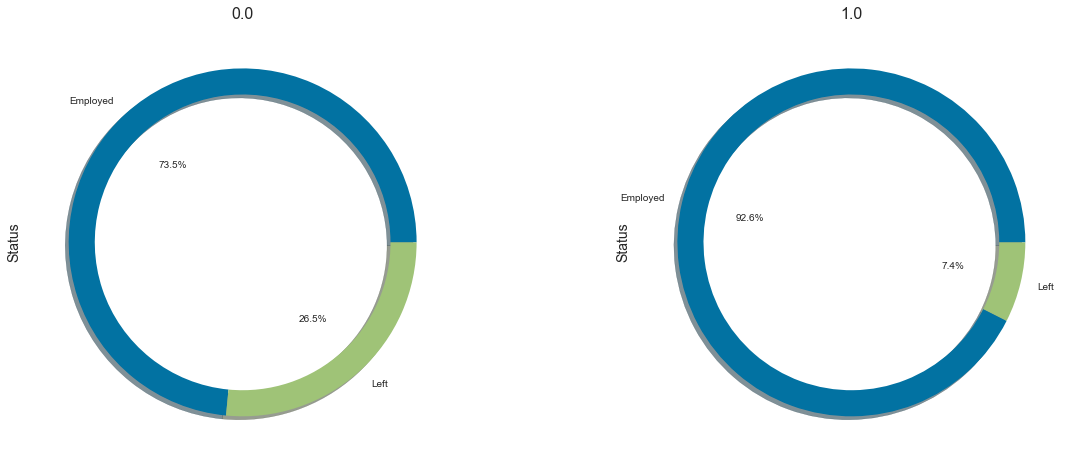

In [99]:
# Checking for the relationship between filed_complaints and status(attrition)

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
gender = list(emp_data['filed_complaint'].unique())
custom_index = [0,1]
for i, j in zip(gender, custom_index):
    emp_data['status'][emp_data['filed_complaint']==i].value_counts() \
                                         .plot \
                                         .pie(explode=None,
                                              autopct='%1.1f%%', 
                                              wedgeprops=dict(width=0.15), 
                                              ax=ax[j], shadow=True)                                   
    ax[j].set_title(label= i, size=16)
    ax[j].set_ylabel(ylabel='Status', size=14)
plt.show()

# 7. Data Post-Processing

## 7.1. Feature Scaling and Dummification

### Encoding the target variable

**1 = Left**

**0 = Employed**

In [100]:
df=emp_data.copy(deep=True)
# Encoding target feature with binary values; Requires for target encoding
df['status_enc'] = df['status'].apply(lambda x: 1 if x=='Left' else 0)

In [101]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head,status_enc
0,246.00000,D00-SS,0.00000,0.86684,6,0.00000,medium,0.13442,Left,4.00,124467,42,Female,Married,Sales,Edward J Bayley,1
1,134.00000,D00-SS,0.00000,0.55572,2,0.00000,low,0.51104,Left,3.00,112210,23,Female,Unmarried,Sales,Edward J Bayley,1
2,156.00000,D00-SS,1.00000,0.47408,2,0.00000,medium,0.40510,Left,3.00,126150,24,Female,Unmarried,Sales,Edward J Bayley,1
3,256.00000,D00-SP,0.00000,0.96136,6,0.00000,low,0.15297,Left,4.00,125346,51,Female,Married,Support,Amelia Westray,1
4,146.00000,D00-SS,0.00000,0.50735,2,0.00000,medium,0.43484,Left,3.00,113707,23,Female,Unmarried,Sales,Edward J Bayley,1


In [102]:
# Dropping encoded target features
df.drop(['status', 'dept_name', 'dept_head', 'employee_id'], axis=1, inplace=True)
df.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'tenure',
       'age', 'gender', 'marital_status', 'status_enc'],
      dtype='object')

### Dummification of Categorical columns

In [103]:
# Performing one-hot encoding over Term & Home Ownership
df = pd.get_dummies(data=df, columns=['gender','marital_status','salary','department'])

# Performing KFold target encoding over years in current job & purpose
#for col in list(['Years in current job', 'Purpose']):
#  kfold_te = KFoldTargetEncoder(colnames=col, targetName='Loan Status Encoded', discardOriginal_col=True)
#  data = kfold_te.fit_transform(X=data)

print('Encoding Success!!!')

Encoding Success!!!


In [104]:
df.shape

(14116, 27)

In [105]:
df.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'satisfaction', 'tenure', 'age', 'status_enc',
       'gender_Female', 'gender_Male', 'marital_status_Married',
       'marital_status_Unmarried', 'salary_high', 'salary_low',
       'salary_medium', 'department_D00-AD', 'department_D00-ENG',
       'department_D00-FN', 'department_D00-IT', 'department_D00-MN',
       'department_D00-MT', 'department_D00-PD', 'department_D00-PR',
       'department_D00-SP', 'department_D00-SS', 'department_D00-TP'],
      dtype='object')

In [106]:
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,age,status_enc,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,salary_high,salary_low,salary_medium,department_D00-AD,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP
0,246.00000,0.00000,0.86684,6,0.00000,0.13442,4.00,42,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,134.00000,0.00000,0.55572,2,0.00000,0.51104,3.00,23,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,156.00000,1.00000,0.47408,2,0.00000,0.40510,3.00,24,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,256.00000,0.00000,0.96136,6,0.00000,0.15297,4.00,51,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,146.00000,0.00000,0.50735,2,0.00000,0.43484,3.00,23,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


### Scaling data with StandardScaler

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [108]:
X_scaled = df

In [109]:
y = df['status_enc']

In [110]:
X_scaled.drop(['status_enc'], axis=1, inplace=True)

In [111]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   avg_monthly_hrs           14116 non-null  float64
 1   filed_complaint           14116 non-null  float64
 2   last_evaluation           14116 non-null  float64
 3   n_projects                14116 non-null  int64  
 4   recently_promoted         14116 non-null  float64
 5   satisfaction              14116 non-null  float64
 6   tenure                    14116 non-null  object 
 7   age                       14116 non-null  int64  
 8   gender_Female             14116 non-null  uint8  
 9   gender_Male               14116 non-null  uint8  
 10  marital_status_Married    14116 non-null  uint8  
 11  marital_status_Unmarried  14116 non-null  uint8  
 12  salary_high               14116 non-null  uint8  
 13  salary_low                14116 non-null  uint8  
 14  salary

In [112]:

X_scaled[['avg_monthly_hrs','last_evaluation','n_projects','satisfaction', 'tenure','age']] = scaler.fit_transform(X_scaled[['avg_monthly_hrs','last_evaluation','n_projects','satisfaction', 'tenure','age']])

In [113]:
X_scaled.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,age,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,salary_high,salary_low,salary_medium,department_D00-AD,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP
0,0.90521,0.00000,0.90728,1.77828,0.00000,-1.95453,0.34921,0.91271,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,-1.29842,0.00000,-0.99334,-1.42262,0.00000,-0.44269,-0.33878,-0.99212,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.86557,1.00000,-1.49206,-1.42262,0.00000,-0.86795,-0.33878,-0.89186,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1.10196,0.00000,1.48471,1.77828,0.00000,-1.88003,0.34921,1.81500,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.06232,0.00000,-1.28883,-1.42262,0.00000,-0.74855,-0.33878,-0.99212,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [114]:
X_scaled.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,age,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,salary_high,salary_low,salary_medium,department_D00-AD,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP
0,0.90521,0.00000,0.90728,1.77828,0.00000,-1.95453,0.34921,0.91271,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,-1.29842,0.00000,-0.99334,-1.42262,0.00000,-0.44269,-0.33878,-0.99212,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.86557,1.00000,-1.49206,-1.42262,0.00000,-0.86795,-0.33878,-0.89186,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1.10196,0.00000,1.48471,1.77828,0.00000,-1.88003,0.34921,1.81500,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.06232,0.00000,-1.28883,-1.42262,0.00000,-0.74855,-0.33878,-0.99212,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## 7.2 Data Splitting

In [115]:
# Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (11292, 26) (11292,)
Testing Data Shape: (2824, 26) (2824,)


In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11292 entries, 9046 to 3489
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   avg_monthly_hrs           11292 non-null  float64
 1   filed_complaint           11292 non-null  float64
 2   last_evaluation           11292 non-null  float64
 3   n_projects                11292 non-null  float64
 4   recently_promoted         11292 non-null  float64
 5   satisfaction              11292 non-null  float64
 6   tenure                    11292 non-null  float64
 7   age                       11292 non-null  float64
 8   gender_Female             11292 non-null  uint8  
 9   gender_Male               11292 non-null  uint8  
 10  marital_status_Married    11292 non-null  uint8  
 11  marital_status_Unmarried  11292 non-null  uint8  
 12  salary_high               11292 non-null  uint8  
 13  salary_low                11292 non-null  uint8  
 14  sala

In [117]:
y_train.head()

9046     0
12047    0
1262     1
11450    0
10882    0
Name: status_enc, dtype: int64

# 9. Model Development and Evaluation


### Model Development & Evaluation without Tuning---

- In this section we will develop variety of models such as: 

|Logistic Regression|Decision Tree|Random Forest|Bagging|Adaptive Boosting|Gradient Boosting|Voting Classifier|
|:--|:--|:--|:--|:--|:--|:--|

- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**.

- Considering the complexity of data, we can run a **loop** over multiple **classifiers** and estimate the accuracy of the model.



## Ensemble Technique

In [118]:
# Initialize classifiers
log_clf = LogisticRegression(random_state = 42, class_weight='balanced')
sv_clf = SVC(random_state=42, class_weight='balanced', probability=True)
dt_clf = DecisionTreeClassifier(random_state = 42, class_weight='balanced')
bag_clf = BaggingClassifier(base_estimator=dt_clf, n_estimators=500, n_jobs=-1, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=500, random_state = 42, class_weight='balanced', n_jobs=-1)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('dt', dt_clf), ('svc', sv_clf)], voting='soft')
ada_clf = AdaBoostClassifier(base_estimator=dt_clf, n_estimators=500, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state = 42)

In [119]:
# Intialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, bag_clf, voting_clf, rf_clf, ada_clf, gb_clf]

# Create an empty list to append scores and classifier name
train_scores = []
test_scores = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:                     
    # Fit the train data over the classifier object
    clf.fit(X_train, y_train)
    print('Currently running for: ', clf)
    
  # Append train and test score to the empty list
    train_scores.append(np.round(a=clf.score(X_train, y_train), decimals=2))
    test_scores.append(np.round(a=clf.score(X_test, y_test), decimals=2))
    clf_names.append(clf.__class__.__name__)

print('Success!')

Currently running for:  LogisticRegression(class_weight='balanced', random_state=42)
Currently running for:  SVC(class_weight='balanced', probability=True, random_state=42)
Currently running for:  DecisionTreeClassifier(class_weight='balanced', random_state=42)
Currently running for:  BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=42),
                  n_estimators=500, n_jobs=-1, random_state=42)
Currently running for:  VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                            

In [120]:
# Create an accuracy dataframe from scores and names list
accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores}, index=clf_names)

# View the accuracy of all the classifiers
output_table = accuracy_frame.transpose()

output_table

,LogisticRegression,SVC,DecisionTreeClassifier,BaggingClassifier,VotingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
Train Accuracy,0.77000,0.95000,1.00000,1.00000,1.00000,1.00000,1.00000,0.99000
Test Accuracy,0.77000,0.95000,0.97000,0.98000,0.98000,0.98000,0.97000,0.97000


**Observation:**

- The highest **accuracy** achieved on the **test set** is **98%** which is given by **BaggingClassifier and RandomForestClassifier**.

## Implementing DecisionTree Algorithm

In [121]:
# Training the Descision Tree classifier and plotting confusion matrix

def trainDecisionGetConfusion():
    clf = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight='balanced')
    clf.fit(X_train, y_train)

  # Plotting confusion maxtrix of train and test data
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
    plot_confusion_matrix(estimator=clf, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1, labels=(1,0), display_labels=('Left','Employed'))
    plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2, labels=(1,0), display_labels=('Left','Employed'))
    ax1.set_title(label='Train Data', size=14)
    ax2.set_title(label='Test Data', size=14)
    ax1.grid(b=False)
    ax2.grid(b=False)
    plt.suptitle(t='Confusion Matrix', size=16)
    plt.show()

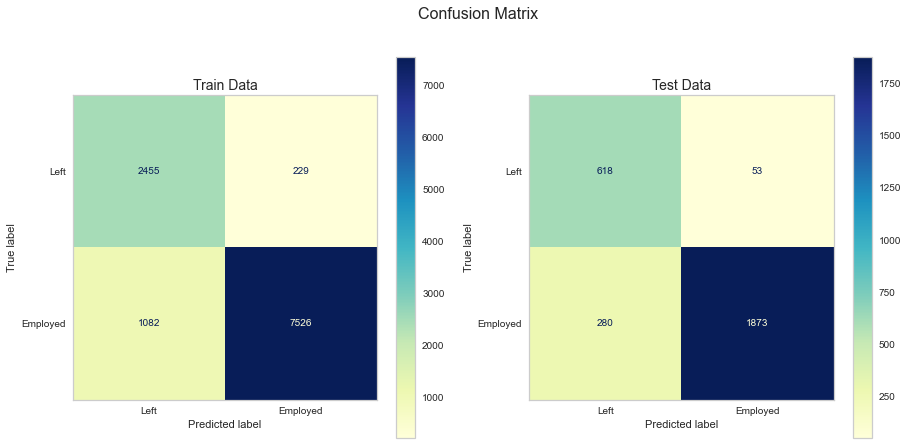

In [122]:
trainDecisionGetConfusion()

In [123]:
# _Predicting the Decision Tree Model and printing the classification report

def getDecisionReport():
    clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    clf.fit(X_train, y_train)

  # Predicting training and testing labels
    y_train_pred_count = clf.predict(X_train)
    y_test_pred_count = clf.predict(X_test)
    F2_train_score = fbeta_score(y_true= y_train, y_pred=y_train_pred_count, average='binary', beta=2)
    F2_test_score = fbeta_score(y_true= y_test, y_pred=y_test_pred_count, average='binary', beta=2)
  
  # Printing the Classification report
    train_report = classification_report(y_train, y_train_pred_count)
    test_report = classification_report(y_test, y_test_pred_count)
    print('                    Training Report          ')
    print(train_report)
    print('                    Testing Report           ')
    print(test_report)
    print('Fb=2 Train Score', F2_train_score)
    print('Fb=2 Test Score', F2_test_score)
    

In [124]:
getDecisionReport()

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8608
           1       1.00      1.00      1.00      2684

    accuracy                           1.00     11292
   macro avg       1.00      1.00      1.00     11292
weighted avg       1.00      1.00      1.00     11292

                    Testing Report           
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2153
           1       0.94      0.93      0.93       671

    accuracy                           0.97      2824
   macro avg       0.96      0.95      0.96      2824
weighted avg       0.97      0.97      0.97      2824

Fb=2 Train Score 1.0
Fb=2 Test Score 0.9304062126642771


## Observations:

-  In this problem statement, recall is the problem statement that demands focus, **False Negative** implying **Predicted Employed, Actually Left**

- So, **Recall** holds more weightage, and so **F beta score= 2**
 - **Train Data:**
  - Model predicted **2455 instances correctly** for **positive class** while **7526 instances** were predicted **correctly** for **negative class**.
  - Model **identified 229 instances negative but in actual** they **were positive**.
  - Model **identified 1082 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **618 instances correctly** for **positive class** while **1873 instances** were predicted **correctly** for **negative class**.
  - Model **identified 53 instance negative but in actual** it **was positive**.
  - Model **identified 280 instances positive but in actual** they **were negative**.
  
- In **Training data** the **Decision Tree** model gives **Recall = 100% accuracy** in but in **Test Data** the **Decision Tree** model gives **Recall = 93% accuracy** for **postive class**
- **Decision Tree** is **Overfitting** 

# 10. Hyperparameter Tuning**


### Fine tuning of DT Classifier with GridsearchCV


In [125]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['Employed', "Left"],
                       filled=True)

In [126]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
   # f_beta_score = fbeta_score(y_test, y_test_pred_count, average='macro', beta=2)

    y_train_pred_count = dt_classifier.predict(X_train)
    y_test_pred_count = dt_classifier.predict(X_test)
    train_report = classification_report(y_train, y_train_pred_count)
    test_report = classification_report(y_test, y_test_pred_count)
    print('                    Training Report          ')
    print(train_report)
    print('                    Testing Report           ')
    print(test_report)
    #print('                    F Beta Scores           ')
    #print(f_beta_score)

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
dt = DecisionTreeClassifier(random_state=42)

In [128]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# 11. Fit and tune models with cross-validation


In [129]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [130]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 1.85 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [131]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.02675,0.01172,0.00387,0.00075,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}",0.84307,0.83564,0.83776,0.83139,0.83696,0.00421,46
1,0.02271,0.00480,0.00396,0.00120,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}",0.84307,0.83564,0.83776,0.83139,0.83696,0.00421,46
2,0.02102,0.00219,0.00369,0.00047,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}",0.84307,0.83564,0.83776,0.83139,0.83696,0.00421,46
3,0.02149,0.00159,0.00370,0.00077,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}",0.84307,0.83564,0.83776,0.83139,0.83696,0.00421,46
4,0.01870,0.00042,0.00386,0.00057,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}",0.84307,0.83564,0.83776,0.83139,0.83696,0.00421,46


In [132]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
40,0.06877,0.00499,0.00360,0.00042,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}",0.96068,0.97166,0.96812,0.96599,0.96661,0.00398,1
15,0.05826,0.00243,0.00296,0.00038,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}",0.96210,0.97202,0.96564,0.96210,0.96546,0.00405,2
45,0.07406,0.00757,0.00315,0.00054,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}",0.95997,0.97202,0.96422,0.96068,0.96422,0.00478,3
20,0.07025,0.00655,0.00418,0.00118,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}",0.96174,0.97095,0.95997,0.96174,0.96360,0.00430,4
17,0.05746,0.00256,0.00479,0.00160,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}",0.96139,0.96847,0.96210,0.95962,0.96289,0.00335,5


In [133]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)

In [134]:
dt_best = grid_search.best_estimator_

In [135]:
evaluate_model(dt_best)

Train Accuracy : 0.9783917817924194
Train Confusion Matrix:
[[8536   72]
 [ 172 2512]]
--------------------------------------------------
Test Accuracy : 0.9652974504249292
Test Confusion Matrix:
[[2116   37]
 [  61  610]]
                    Training Report          
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8608
           1       0.97      0.94      0.95      2684

    accuracy                           0.98     11292
   macro avg       0.98      0.96      0.97     11292
weighted avg       0.98      0.98      0.98     11292

                    Testing Report           
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2153
           1       0.94      0.91      0.93       671

    accuracy                           0.97      2824
   macro avg       0.96      0.95      0.95      2824
weighted avg       0.97      0.97      0.97      2824



In [136]:
#get_dt_graph(dt_best)

## Random Forest Algorithm

In [137]:
# Applying Random forest algorithm
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X_scaled, y)

# Extracting list of important features
selected_feat = X_scaled.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 5
Threshold set by Model: 0.04
Important Features: ['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure']


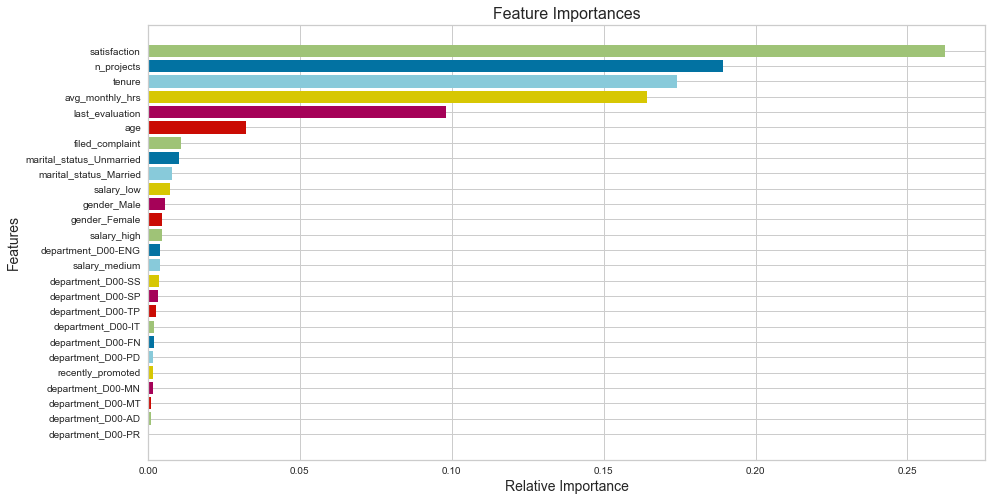

In [138]:
figure = plt.figure(figsize=[15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(X_scaled, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

In [139]:
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
rfc.fit(X_train,y_train)
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

In [140]:
def trainRandomForestGetConfusion():
    rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
    rfc.fit(X_train,y_train)

  # Plotting confusion maxtrix of train and test data
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
    plot_confusion_matrix(estimator=rfc, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1, labels=(1,0), display_labels=('Left','Employed'))
    plot_confusion_matrix(estimator=rfc, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2, labels=(1,0), display_labels=('Left','Employed'))
    ax1.set_title(label='Train Data', size=14)
    ax2.set_title(label='Test Data', size=14)
    ax1.grid(b=False)
    ax2.grid(b=False)
    plt.suptitle(t='Random Forest Confusion Matrix', size=16)
    plt.show()

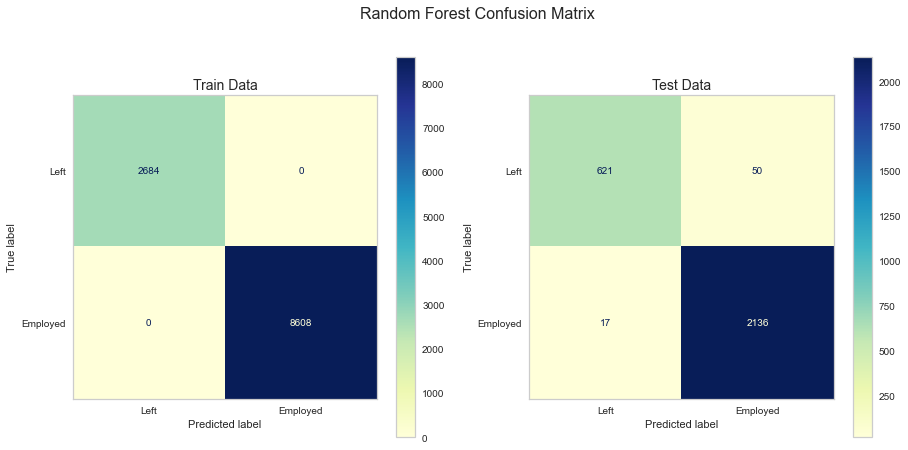

In [141]:
trainRandomForestGetConfusion()

In [142]:
# Printing the accuracy score of the Random Forest classifier model
print('Train Accuracy Score:-',accuracy_score(y_train,y_pred_train))
print('Test Accuracy Score:-',accuracy_score(y_test,y_pred_test))



Train Accuracy Score:- 1.0
Test Accuracy Score:- 0.9762747875354107


In [143]:
# Printing classification report of Random Forest Model

clf = classification_report(y_test,y_pred_test)
clf2 = classification_report(y_train,y_pred_train)
print("On Test Data:--------- \n",clf)
print("On Train Data:--------- \n",clf2)

On Test Data:--------- 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2153
           1       0.97      0.93      0.95       671

    accuracy                           0.98      2824
   macro avg       0.98      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824

On Train Data:--------- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8608
           1       1.00      1.00      1.00      2684

    accuracy                           1.00     11292
   macro avg       1.00      1.00      1.00     11292
weighted avg       1.00      1.00      1.00     11292



## Observations:

1. In **Employee attrition** problem **False Negative** is **more Important** than False Positive

2. So **Recall** is **more importance parameter** than **Precision**


- **Train Data:**
  - Model predicted **2684 instances correctly** for **positive class** while **8608 instances** were predicted **correctly** for **negative class**.
  - Model **identified 0 instances negative but in actual** they **were positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **620 instances correctly** for **positive class** while **2137 instances** were predicted **correctly** for **negative class**.
  - Model **identified 51 instance negative but in actual** it **was positive**.
  - Model **identified 16 instances positive but in actual** they **were negative**.
  
  
3. In **Training data** the **Random Forest** model gives **Recall = 100% accuracy** in but in **Test Data** the **Random Forest** model gives **92% accuracy**

4. **Random Forest** is **Overfitting**

### Hyperparamter tuning with GridsearchCV for Randomforest

In [144]:
rfc = RandomForestClassifier()

In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11292 entries, 9046 to 3489
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   avg_monthly_hrs           11292 non-null  float64
 1   filed_complaint           11292 non-null  float64
 2   last_evaluation           11292 non-null  float64
 3   n_projects                11292 non-null  float64
 4   recently_promoted         11292 non-null  float64
 5   satisfaction              11292 non-null  float64
 6   tenure                    11292 non-null  float64
 7   age                       11292 non-null  float64
 8   gender_Female             11292 non-null  uint8  
 9   gender_Male               11292 non-null  uint8  
 10  marital_status_Married    11292 non-null  uint8  
 11  marital_status_Unmarried  11292 non-null  uint8  
 12  salary_high               11292 non-null  uint8  
 13  salary_low                11292 non-null  uint8  
 14  sala

In [146]:
X_train.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,age,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,salary_high,salary_low,salary_medium,department_D00-AD,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP
9046,-0.27531,1.00000,-0.90520,0.17783,0.00000,1.45489,0.34921,0.31119,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
12047,0.43300,0.00000,-1.57570,0.17783,0.00000,-0.23513,-0.33878,-0.89186,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1262,-1.21972,0.00000,-0.99237,-1.42262,0.00000,-0.66908,-0.33878,-0.39059,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
11450,-1.27875,0.00000,-0.00000,-0.62239,0.00000,0.28514,-0.33878,-0.49084,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
10882,0.13787,0.00000,1.39446,0.17783,0.00000,0.02113,-0.33878,2.01551,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [147]:
from sklearn.model_selection import GridSearchCV
#number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start =10, stop = 80, num = 10)]
#no of features to consider at every split
max_features = ['auto', 'sqrt']
#Max no of levels in the tree
max_depth = [2,4]
#Min number of samples required to split a node
min_samples_split = [2,5]
#Min no of samples required at each leaf node
min_samples_leaf =  [1,2]
#method of selecting samples for training each tree
bootstrap = [True, False]


#clf = GridSearchCv(estimator, param_grid, cv, scoring)

In [148]:
forest_params = {'n_estimators':n_estimators ,
                'max_features':max_features,
                'min_samples_split': min_samples_split,
                'min_samples_leaf':min_samples_leaf,
                'bootstrap': bootstrap
                }
print(forest_params)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [149]:

#forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,25))}] 
clf = GridSearchCV(rfc, forest_params, cv = 3,verbose=3, n_jobs=4,  scoring='accuracy')


In [150]:
%%time
clf.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
Wall time: 1min 10s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             scoring='accuracy', verbose=3)

In [151]:
print(clf.best_params_)

{'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 56}


In [152]:
print(clf.best_score_)

0.9759121501948282


In [153]:
rfc_best = clf.best_estimator_

In [154]:
print(rfc_best)


RandomForestClassifier(bootstrap=False, n_estimators=56)


In [155]:
#Finalizing the Random Forest Model with the best parameters
rfc2 = RandomForestClassifier(n_estimators=17,random_state=42,min_samples_leaf=1, min_samples_split=2,bootstrap=False,class_weight='balanced',max_features='sqrt', n_jobs=4) 

rfc2.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features='sqrt', n_estimators=17, n_jobs=4,
                       random_state=42)

In [156]:
# Make predictions for the test set
y_pred_test = rfc2.predict(X_test)

In [157]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.976628895184136

In [158]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[2136,   17],
       [  49,  622]], dtype=int64)

In [159]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2153
           1       0.97      0.93      0.95       671

    accuracy                           0.98      2824
   macro avg       0.98      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824



In [160]:
rfc2.feature_importances_

array([1.48955906e-01, 1.86325046e-02, 1.19966887e-01, 1.69616405e-01,
       1.02228234e-03, 2.30768633e-01, 2.19306279e-01, 2.82874857e-02,
       4.36266714e-03, 6.66870028e-03, 7.96579581e-03, 5.94467773e-03,
       6.15841743e-03, 5.92571222e-03, 3.35469760e-03, 8.67699708e-04,
       3.94977503e-03, 1.75726863e-03, 1.87259450e-03, 1.55283759e-03,
       1.29769093e-03, 1.35768100e-03, 1.88404931e-04, 3.91904221e-03,
       4.11408875e-03, 2.18586505e-03])

Text(0.5, 0, 'Random Forest Feature Importance')

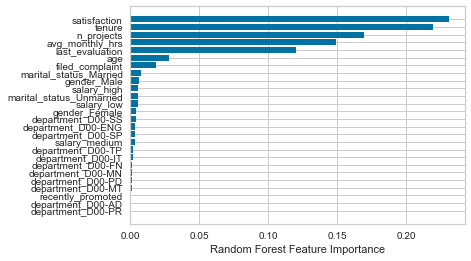

In [161]:
sorted_idx = rfc2.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rfc2.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
 

# Finalizing the model with Hyper parameters tuning

##  Finalize the Random Forest Model with only Important Features

### ['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure'] are the important columns

In [162]:
X_train_IF2=pd.DataFrame()
X_train_IF2=X_train.copy(deep=True)

In [163]:
X_train_IF2.drop(axis=1, columns=['marital_status_Married','marital_status_Unmarried','recently_promoted' ,'filed_complaint','salary_low','salary_medium','salary_high', 'age', 'gender_Female', 'gender_Male'], inplace=True)

In [164]:
X_train_IF2 = X_train_IF2[X_train_IF2.columns.drop(list(df.filter(regex='department_')))]

In [165]:
X_train_IF2.head()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure
9046,-0.27531,-0.90520,0.17783,1.45489,0.34921
12047,0.43300,-1.57570,0.17783,-0.23513,-0.33878
1262,-1.21972,-0.99237,-1.42262,-0.66908,-0.33878
11450,-1.27875,-0.00000,-0.62239,0.28514,-0.33878
10882,0.13787,1.39446,0.17783,0.02113,-0.33878


In [166]:
rfc5 = RandomForestClassifier(n_estimators=17,random_state=42,min_samples_leaf=1, min_samples_split=2,bootstrap=False,class_weight='balanced',max_features='sqrt', n_jobs=4) 

In [167]:
rfc5.fit(X_train_IF2,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features='sqrt', n_estimators=17, n_jobs=4,
                       random_state=42)

In [168]:
#Preparing X Test for prediction
X_test_IF2=pd.DataFrame()
X_test_IF2=X_test.copy(deep=True)

In [169]:
X_test_IF2.drop(axis=1, columns=['marital_status_Married','marital_status_Unmarried','recently_promoted' ,'filed_complaint','salary_low','salary_medium','salary_high', 'age', 'gender_Female', 'gender_Male'], inplace=True)

In [170]:
X_test_IF2 = X_test_IF2[X_test_IF2.columns.drop(list(df.filter(regex='department_')))]

In [171]:
X_test_IF2.head()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure
13958,0.80683,1.07922,-0.62239,0.34466,-0.33878
5689,1.12164,1.25049,-0.62239,0.90948,1.03721
7532,-1.37713,-1.89651,-1.42262,-0.02094,-0.33878
11411,-1.43615,-1.07748,-1.42262,-0.65732,-0.33878
12740,1.02326,-0.84663,0.17783,0.43208,-1.02678


In [172]:
y_pred_train_IF2=rfc5.predict(X_train_IF2)
y_pred_test_IF2=rfc5.predict(X_test_IF2)

In [174]:
from sklearn.metrics import classification_report
clf3 = classification_report(y_test,y_pred_test_IF2)
clf4 = classification_report(y_train,y_pred_train_IF2)
print("On Test Data Imp Feature:--------- \n",clf3)
print("On Train Data Imp Feature:--------- \n",clf4)

On Test Data Imp Feature:--------- 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2153
           1       0.97      0.94      0.95       671

    accuracy                           0.98      2824
   macro avg       0.98      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824

On Train Data Imp Feature:--------- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8608
           1       1.00      1.00      1.00      2684

    accuracy                           1.00     11292
   macro avg       1.00      1.00      1.00     11292
weighted avg       1.00      1.00      1.00     11292



# 13. Processing the Unseen Data


In [176]:
wd = os.getcwd()
print("Current Director is ", wd)

#Change as required
os.chdir('C:\RamP\DataS\INSAID PGP AI & DS\Capstone\ML Capstone Project')

print("Current Director is ", os.getcwd())


filecheck = os.path.exists('GCD_Capstone_Project_unseen_data - GCD_Capstone_Project_unseen_data.csv')

print("Now we will read the file(",filecheck,") and try to print the matrices")
#Change as required
unseen_data = pd.read_csv('GCD_Capstone_Project_unseen_data - GCD_Capstone_Project_unseen_data.csv')
unseen_data .head()
 

Current Director is  C:\Users\hp
Current Director is  C:\RamP\DataS\INSAID PGP AI & DS\Capstone\ML Capstone Project
Now we will read the file( True ) and try to print the matrices


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,nan,0.52884,2,nan,low,0.40046,3.00000,119045
1,221,D00-PD,nan,0.78456,2,nan,low,0.75951,3.00000,112223
2,156,D00-SS,nan,0.54518,2,nan,medium,0.33646,3.00000,103924
3,133,D00-PR,nan,nan,4,nan,medium,0.83204,2.00000,105922
4,135,D00-SS,nan,0.45464,2,nan,low,0.32072,5.00000,103297


### Observations:
 1.  **missing values**  in **department, filed_complaint, last_evaluation, recently_promoted, satisfaction, tenure**
 2. 100 rows and 9 columns

In [177]:
#profile = ProfileReport(df = unseen_data)
#profile

In [178]:

miss_unseen_df = pd.DataFrame(unseen_data.shape[0]- unseen_data.count(), columns = ['missing_count'])
miss_unseen_df

,missing_count
avg_monthly_hrs,0
department,2
filed_complaint,85
last_evaluation,17
n_projects,0
recently_promoted,97
salary,0
satisfaction,3
tenure,3
employee_id,0


In [179]:
unseen_data.duplicated().any()

False

#### Observations:

1. **Missing Values in Department, filed complaint, last_evaluation, recently_promoted, satisfaction and tenure**
2.  **No duplicate values**
3. **employee_id** have unique values


### Observations:

1. **No duplicate entries** of the **employee_id** where **department= Null** found for replacement
2. Only way to fill up missing values is with **Mode  of department** column in employee_data

In [180]:

#### Filling up the missing values in department column with mode

unseen_data['department']= unseen_data['department'].fillna(unseen_data['department'].mode()[0])
unseen_data['department'].isna().sum()

0

In [181]:
# checking the values of department in employee_data
unseen_data['department'].value_counts()

D00-SS     29
D00-ENG    17
D00-SP     13
D00-IT      9
D00-MT      7
D00-PD      7
D00-FN      6
D00-MN      5
D00-TP      3
-IT         2
D00-AD      1
D00-PR      1
Name: department, dtype: int64

### Observations:

1. **department** column in **employee** have inconsistent data **-IT**. This value is **not listed** in **dept_id** column of **department_data**
2. **replacing** the value **-IT** with **D00-IT** in **department**


In [182]:
# Replacing the value
unseen_data['department'].replace(to_replace='-IT', value='D00-IT', inplace = True)
unseen_data['department'].value_counts()

D00-SS     29
D00-ENG    17
D00-SP     13
D00-IT     11
D00-MT      7
D00-PD      7
D00-FN      6
D00-MN      5
D00-TP      3
D00-AD      1
D00-PR      1
Name: department, dtype: int64

In [487]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


### Observations:

1. Total no. of **records** are **100**
2. **filed_complaint, last_evaluation, recently_promoted, satisfaction, tenure** have missing values
3. Total no. of **columns** are **9**

In [183]:
### Checking the filed_compliant column

unseen_data['filed_complaint'].value_counts()

1.00000    15
Name: filed_complaint, dtype: int64

#### Observations:

1. **filed_complaint** have values **1** and **None**
2. We can assume that:
          1= Complaint filed as YES 
          None= Compliant filed as NO
           
3. **Replacing Null with zero** for better interpretation where:
               1= Complaint filed as YES
               0= Compliant filed as NO

In [184]:
# replacing null values with 0

unseen_data['filed_complaint']= unseen_data['filed_complaint'].fillna(0)
unseen_data['filed_complaint'].value_counts()

0.00000    85
1.00000    15
Name: filed_complaint, dtype: int64

<AxesSubplot:>

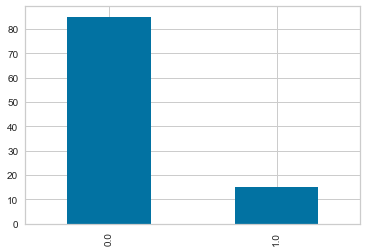

In [185]:
# plotting the filed_compliant

unseen_data['filed_complaint'].value_counts().plot(kind='bar')

### Checking the last_evaluation column

In [186]:
unseen_data['last_evaluation'].describe()

count   83.00000
mean     0.74411
std      0.16954
min      0.39680
25%      0.57618
50%      0.74813
75%      0.90146
max      1.00000
Name: last_evaluation, dtype: float64

In [187]:
unseen_data['last_evaluation'].isna().sum()

17

#### Observations:

1. **17 missing values**
2. **Normally distributed**
3. Replacing with **mean**

In [188]:
# Filling up missing values with mean
unseen_data['last_evaluation']= unseen_data['last_evaluation'].fillna(unseen_data['last_evaluation'].mean())
unseen_data['last_evaluation'].isna().sum()

0

In [189]:
unseen_data['last_evaluation'].describe()

count   100.00000
mean      0.74411
std       0.15430
min       0.39680
25%       0.66166
50%       0.74411
75%       0.83703
max       1.00000
Name: last_evaluation, dtype: float64

### Checking for recently_promoted column

In [190]:
unseen_data['recently_promoted'].describe()

count   3.00000
mean    1.00000
std     0.00000
min     1.00000
25%     1.00000
50%     1.00000
75%     1.00000
max     1.00000
Name: recently_promoted, dtype: float64

In [191]:
unseen_data['recently_promoted'].value_counts()

1.00000    3
Name: recently_promoted, dtype: int64

#### Observations:

1. **recently_promoted** have values **1** and **None**
2. We can assume that:
          1= Promoted as YES 
          None= Not promoted as NO
           
3. **Replacing Null with zero** for better interpretation where:
               1= Complaint filed as YES
               0= Compliant filed as NO

In [192]:
unseen_data['recently_promoted'].isna().sum()

97

In [193]:
unseen_data['recently_promoted']= unseen_data['recently_promoted'].fillna(0)
unseen_data['recently_promoted'].isna().sum()

0

### Checking the Satisfaction column

In [194]:
unseen_data['satisfaction'].describe()

count   97.00000
mean     0.62963
std      0.24690
min      0.05152
25%      0.47700
50%      0.66083
75%      0.83204
max      1.00000
Name: satisfaction, dtype: float64

In [195]:
unseen_data['satisfaction'].isna().sum()

3

### Observations:

1. **3 Missing values** 
2. **Mean=0.62963** and **Median= 0.66083**, implying **slight right skewness**
3. **Replace missing values** with **mean**

In [196]:
unseen_data['satisfaction']= unseen_data['satisfaction'].fillna(unseen_data['satisfaction'].mode()[0])
unseen_data['satisfaction'].isna().sum()

0

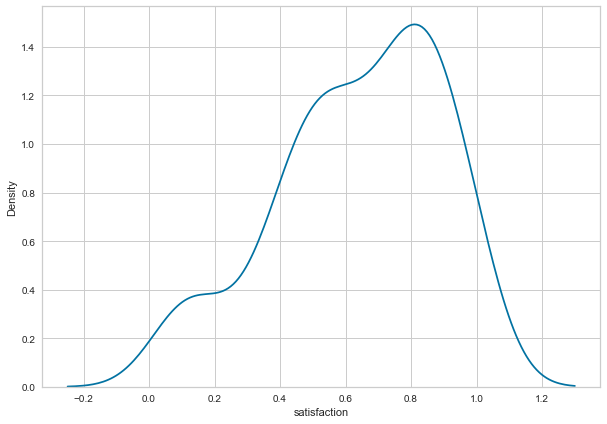

In [197]:
fig = plt.figure(figsize =(10, 7))
sns.kdeplot(x=unseen_data['satisfaction'])
plt.show()

### Checking tenure column

In [198]:
unseen_data['tenure'].value_counts()

3.00000     40
2.00000     27
4.00000     11
5.00000     10
6.00000      5
7.00000      2
10.00000     2
Name: tenure, dtype: int64

In [199]:
unseen_data['tenure'].describe()

count   97.00000
mean     3.42268
std      1.56681
min      2.00000
25%      2.00000
50%      3.00000
75%      4.00000
max     10.00000
Name: tenure, dtype: float64

### Observations:

1. **tenure** have **3 missing values** 
2. **Mean=3.42268** and **Median=3.00000**, indicating little left skewness
3. Replacing missing values with Mean

In [200]:
unseen_data['tenure'].fillna(unseen_data['tenure'].mean(), inplace= True)
unseen_data['tenure'].describe()

count   100.00000
mean      3.42268
std       1.54289
min       2.00000
25%       2.00000
50%       3.00000
75%       4.00000
max      10.00000
Name: tenure, dtype: float64

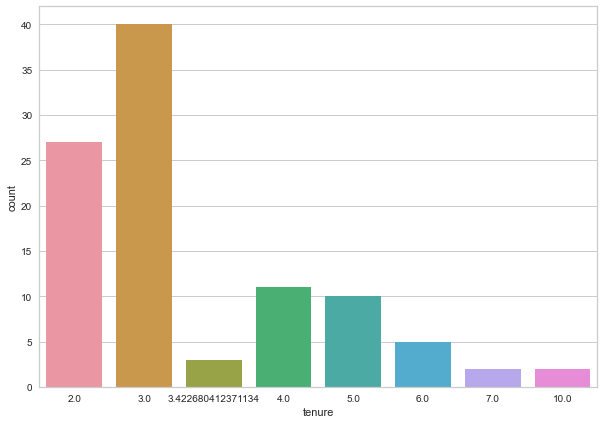

In [201]:
fig = plt.figure(figsize =(10, 7))
sns.countplot(x=unseen_data['tenure'])
plt.show()

### Checking avg_monthly_hrs column

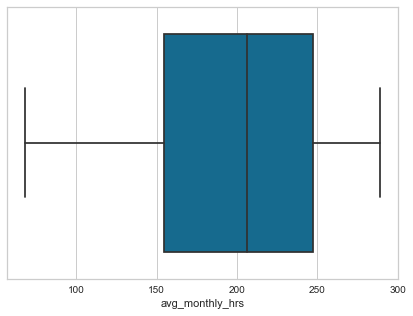

In [202]:
# checking for outliers

fig = plt.figure(figsize =(7,5))
sns.boxplot(x=unseen_data['avg_monthly_hrs'])
plt.show()

#### Observations:

1. No missing values
2. No outliers

### Checking the n_projects columns

In [203]:
unseen_data['n_projects'].describe()      

count   100.00000
mean      3.76000
std       1.34930
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       7.00000
Name: n_projects, dtype: float64

In [204]:
unseen_data['n_projects'].value_counts()

4    26
2    23
5    22
3    18
6     9
7     1
1     1
Name: n_projects, dtype: int64

In [205]:
miss_unseen_df = pd.DataFrame(unseen_data.shape[0]- unseen_data.count(), columns = ['missing_count'])
miss_unseen_df

,missing_count
avg_monthly_hrs,0
department,0
filed_complaint,0
last_evaluation,0
n_projects,0
recently_promoted,0
salary,0
satisfaction,0
tenure,0
employee_id,0


### Important Features: ['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure']

In [206]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    float64
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    float64
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [207]:
bkp_unseen_data = pd.DataFrame()
bkp_unseen_data=unseen_data.copy(deep=True)

In [208]:
employee_id = unseen_data.employee_id
employee_id_List = employee_id.tolist()

In [209]:
unseen_data.drop(['employee_id'],axis=1,inplace=True)

In [210]:

unseen_data.drop(['department'],axis=1,inplace=True)

In [211]:
unseen_data.drop(['filed_complaint','recently_promoted', 'salary' ],axis=1,inplace=True)

In [212]:
unseen_data.head()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure
0,134,0.52884,2,0.40046,3.00000
1,221,0.78456,2,0.75951,3.00000
2,156,0.54518,2,0.33646,3.00000
3,133,0.74411,4,0.83204,2.00000
4,135,0.45464,2,0.32072,5.00000


In [220]:
# Initialize a list of scaled features

scalerlabels = ['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction','tenure'] 
               

def dataScaler(data=None, labels=None):
    scaler = StandardScaler()
    Xtrans = scaler.fit_transform(data[labels])
    scaledframe = pd.DataFrame(data=Xtrans, columns=labels)
    return scaledframe


X_unseen_scaled = dataScaler(data=unseen_data , labels=scalerlabels)
X_unseen_scaled.head()

 

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure
0,-1.22470,-1.40223,-1.31095,-0.96101,-0.27533
1,0.41932,0.26346,-1.31095,0.47503,-0.27533
2,-0.80897,-1.29579,-1.31095,-1.21701,-0.27533
3,-1.24360,0.00000,0.17877,0.76510,-0.92673
4,-1.20580,-1.88558,-1.31095,-1.27994,1.02747


In [221]:
X_unseen_final_data = X_unseen_scaled.copy(deep = True)
 

In [222]:
X_unseen_final_data.head()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure
0,-1.22470,-1.40223,-1.31095,-0.96101,-0.27533
1,0.41932,0.26346,-1.31095,0.47503,-0.27533
2,-0.80897,-1.29579,-1.31095,-1.21701,-0.27533
3,-1.24360,0.00000,0.17877,0.76510,-0.92673
4,-1.20580,-1.88558,-1.31095,-1.27994,1.02747


In [224]:
#Checking how many columns the model was trained on vs the columns in unseen data

X_train_IF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11292 entries, 9046 to 3489
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_monthly_hrs  11292 non-null  float64
 1   last_evaluation  11292 non-null  float64
 2   n_projects       11292 non-null  float64
 3   satisfaction     11292 non-null  float64
 4   tenure           11292 non-null  float64
dtypes: float64(5)
memory usage: 529.3 KB


In [225]:
X_unseen_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_monthly_hrs  100 non-null    float64
 1   last_evaluation  100 non-null    float64
 2   n_projects       100 non-null    float64
 3   satisfaction     100 non-null    float64
 4   tenure           100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


# 14. Predicting the Unseen Data

In [229]:
y_pred_unseen_data2=rfc5.predict(X_unseen_final_data)
y_pred_unseen_data2


array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [230]:
y_predproba_unseen_data2=rfc5.predict_proba(X_unseen_final_data)

In [231]:
y_prproba_unseen_data_sel2 = y_predproba_unseen_data2[:,1]
y_prproba_unseen_data_sel2

array([1.        , 0.        , 1.        , 0.        , 0.17647059,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05882353, 1.        , 1.        , 0.        , 0.29411765,
       0.        , 1.        , 0.        , 0.05882353, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.94117647, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.41176471, 1.        , 0.        , 0.        ,
       1.        , 0.11764706, 0.17647059, 0.05882353, 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.05882353,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.11764706, 0.        , 1.        , 0.        , 1.        ,
       0.05882353, 0.        , 0.        , 0.        , 1.     

In [232]:
Final_Pred_unseen_data2 = pd.DataFrame(list(zip(employee_id_List, y_pred_unseen_data2,y_prproba_unseen_data_sel2)),columns =['employee_id_List', 'Prediction','PredictProba'])

In [233]:
Final_Pred_unseen_data2.Prediction.value_counts()

0    75
1    25
Name: Prediction, dtype: int64

In [235]:
Final_Pred_unseen_data4 = pd.DataFrame(list(zip(employee_id_List,y_prproba_unseen_data_sel2)),columns =['employee_id_List','PredictProba'])

In [236]:
Final_Pred_unseen_data4.head()

,employee_id_List,PredictProba
0,119045,1.00000
1,112223,0.00000
2,103924,1.00000
3,105922,0.00000
4,103297,0.17647


In [237]:
Final_Pred_unseen_data4.to_csv('1001.csv',header=False)

In [238]:
wd = os.getcwd()
print("Current Director is ", wd)

Current Director is  C:\RamP\DataS\INSAID PGP AI & DS\Capstone\ML Capstone Project
